In [2]:
%load_ext autoreload
%autoreload 2
import sys
for p in ['../simulations/', '../utils/']:
    if p not in sys.path:
        sys.path.append(p)

from brian2 import *
from scipy.signal import welch
from multiprocessing import Pool
from plotlib import *

import itertools
import experiment_ping_module as ex_9
import power_spectral_density as psd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('lines', linewidth=3)
plt.rc('legend', fontsize=14)

In [11]:
def plot_ma(n, x, dt, shift, ax=None, color=None, label=None):
    #dt, shift = 50, 10
    start = 1000
    end = max(start, max(x))
    ma, t = psd.moving_average(x, dt, shift, start, end)
    ma = 100.0 * ma / n
    if not ax:
        _, ax = plt.subplots()
        
    #ax.set_xlabel('Time (ms)', fontsize=18)
    ax.set_ylabel('Firing rate\n (% neurons/ms)')
    ax.plot(t, ma, color=color, label=label)
    
def plot_spectrum(x, dt, shift, ax=None, color=None, label=None):
    #dt, shift = 75, 10
    if not ax:
        _, ax = plt.subplots()
        
    start, end = 1000, max(x)
    f, pxx = psd.power_spectrum(x, dt, shift, start, end)
    ax.semilogy(f, pxx, color=color, label=label)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Power')
    

In [39]:
def exp9a(a):
    return ex_9.run_simulation(exex_weight=a)

p = Pool(8)
args_a = np.arange(0, 20, 2)
results_a = p.map(exp9a, args_a)


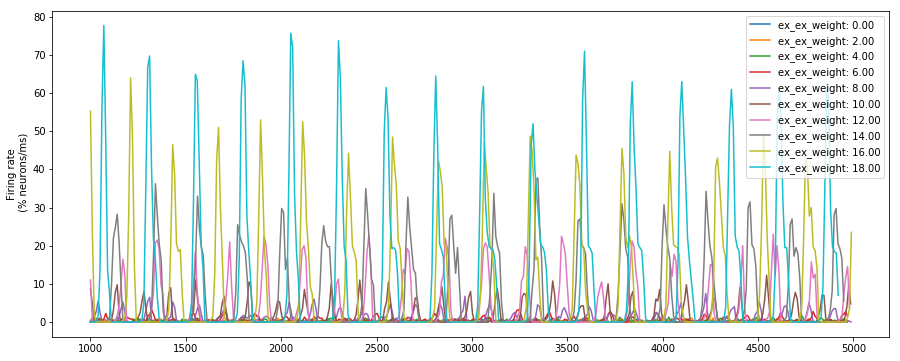

In [43]:
f, ax = plt.subplots(1, 1, figsize=(15,6))
dt, shift = 10, 10
for i, data in enumerate(results_a):
    N, X = data['N_EX'], data['X']
    plot_ma(N, X, dt, shift, ax=ax, color="C{}".format(i),
            label="ex_ex_weight: {:.2f}".format(args_a[i]))
ax.legend()
plt.show()

In [61]:
# 50 Hz Parameters
a, b, c, d = 5, 10, 10, 10
data50 = ex_9.run_simulation(
    n_ex=40,
    n_in = 10,
    exin_w=(10,2),
    inex_w=(10,2),
    inin_w=(10,2),
    exin_d=(5,1),
    inex_d=(5,1),
    inin_d=(5,1),
    
)

Setting up synapses:
	EX_IN_SYN... (288 synapses) [0.03s]
	IN_EX_SYN... (400 synapses) [0.03s]
	IN_IN_SYN... (100 synapses) [0.02s]
 [0.11s]
Running sym...  [7.34s]


5,524 exc spikes, 4,791 inh spikes
(0, 0, 10, 40)
[28 20 18  6 20  4  9 35 18 12]
[2 6 0 5 4 1 9 7 3 8]


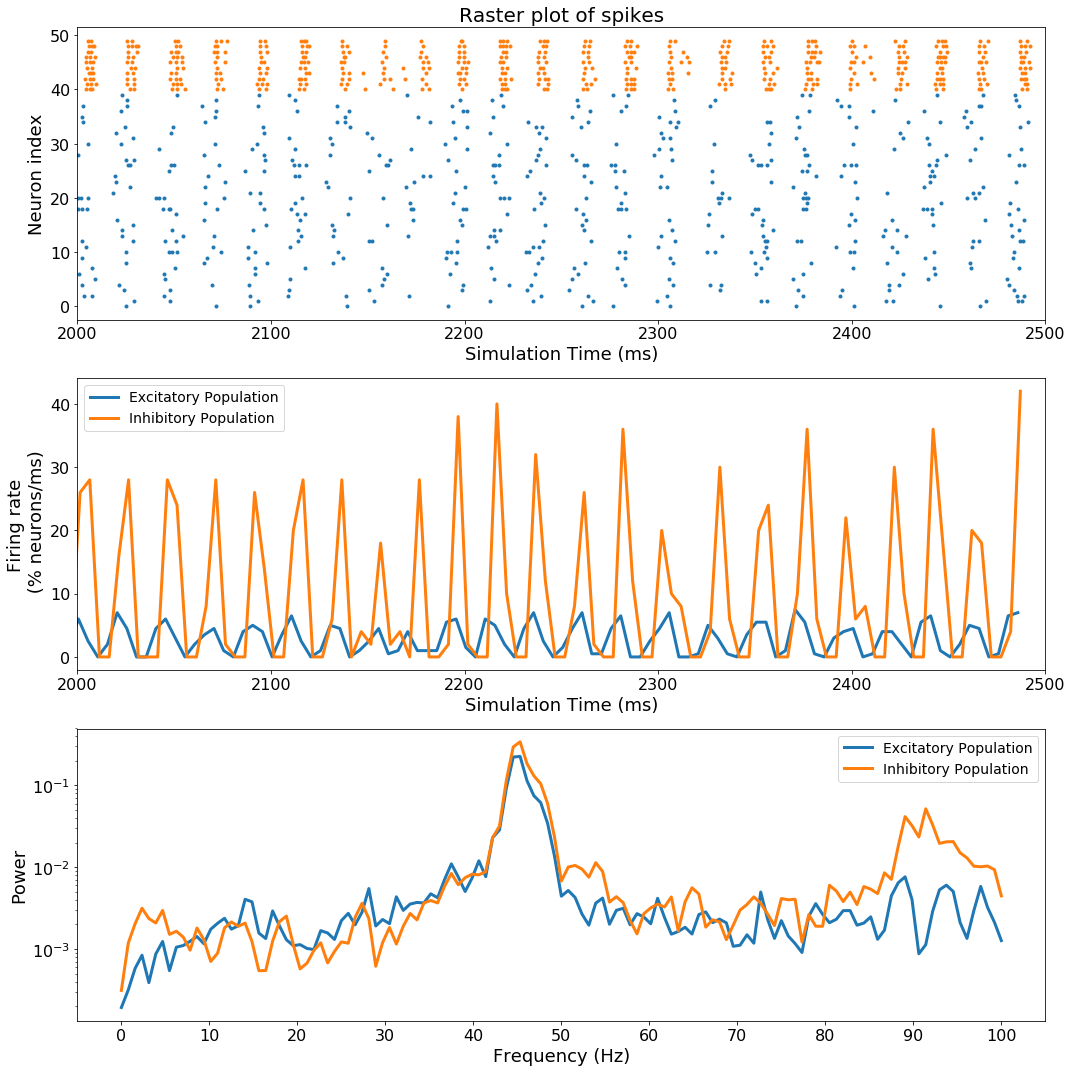

In [63]:
plot_stuff(data, start=2000, end=2500, save='figures/ping_50hz.png')

In [135]:
# Test different frequencies
seed(None)
d = np.random.random() * 20
d = 10

print("Mean delay: {}".format(d))
# Changing all delays down to (1,1) we go to up to 90Hz
data = ex_9.run_simulation(
    n_ex=40,
    n_in=10,
    exin_w=(10,2),
    inex_w=(10,2),
    inin_w=(10,2),
    exin_d=(d,2),
    inex_d=(d,2),
    inin_d=(d,2)
    
)

Mean delay: 10
Setting up synapses:
	EX_IN_SYN... (288 synapses) [0.02s]
	IN_EX_SYN... (400 synapses) [0.02s]
	IN_IN_SYN... (100 synapses) [0.02s]
 [0.09s]
Running sym...  [6.78s]


5,588 exc spikes, 5,002 inh spikes
(0, 0, 10, 40)
[ 9 36 20 10  8 26 32 13 37 18]
[1 2 5 1 7 9 3 6 8 5]


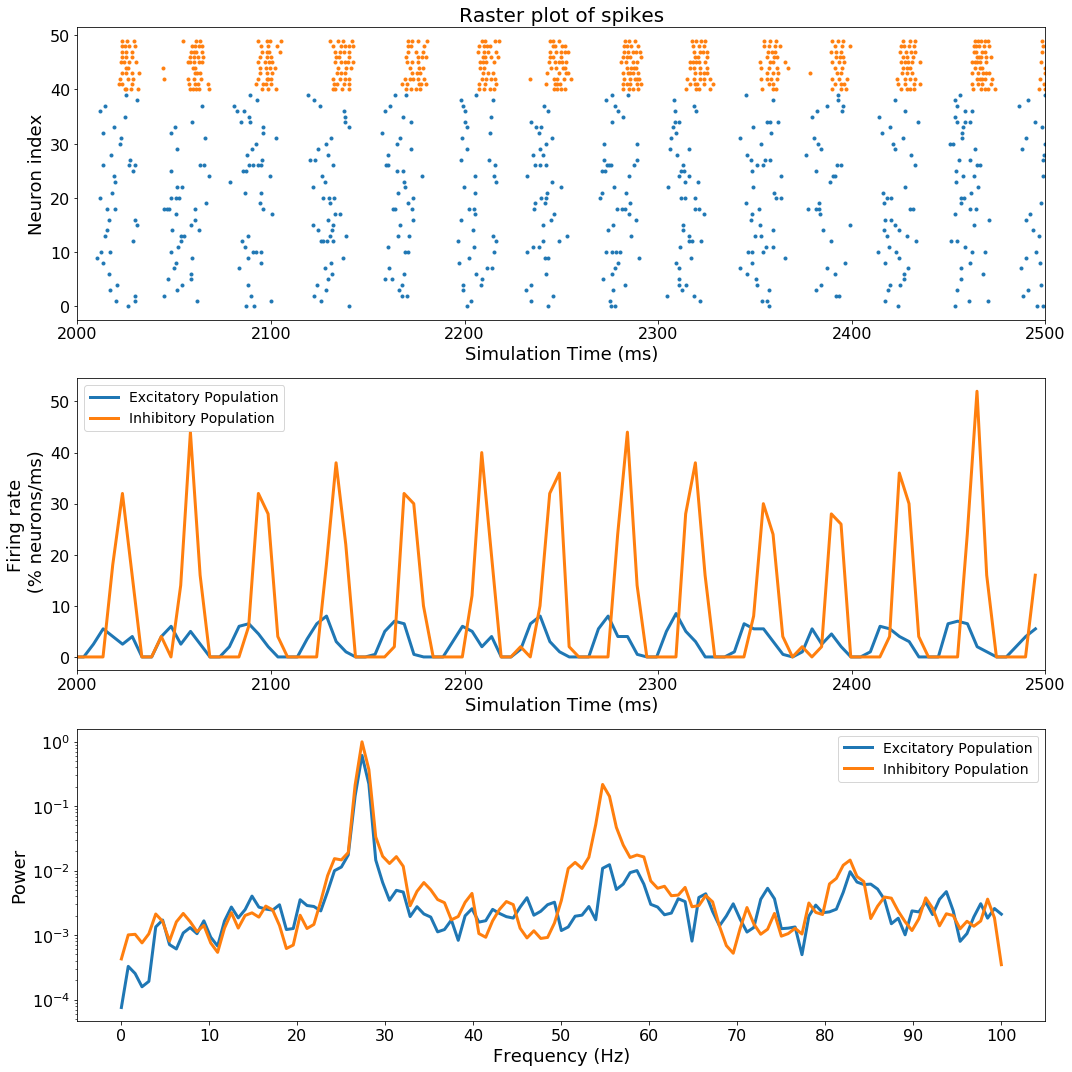

In [136]:
plot_stuff(data, start=2000, end=2500)#, save='figures/ping_50hz.png')

In [16]:

def func(arg):#, d1, d2, d3, d4):
    a, b, c, d, exconn, inconn, delay1, delay2, delay3 = arg
    return ex_9.run_simulation(
        exex_weight=a,
        exin_weight=b,
        inex_weight=c,
        inin_weight=d,
        ex_conn=exconn,
        in_conn=inconn,
        delay_exex=delay1,
        delay_exin=delay2,
        delay_inex=delay2,
        delay_inin=delay3
    )

a = np.linspace(0, 10, 1)
b = np.linspace(0, 10, 1)
c = np.linspace(0, 10, 1)
d = np.linspace(0, 10, 1)
exconn = np.linspace(0.4, 0.5, 1)
inconn = np.linspace(0.4, 0.5, 1)
delays = [1, 5, 10]
args = itertools.product(a, b, c, d, exconn, inconn, delays, delays, delays)
pool = Pool(8)
results = pool.map(func, args)

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 1, 1, 1)
378 exc spikes, 78 inh spikes


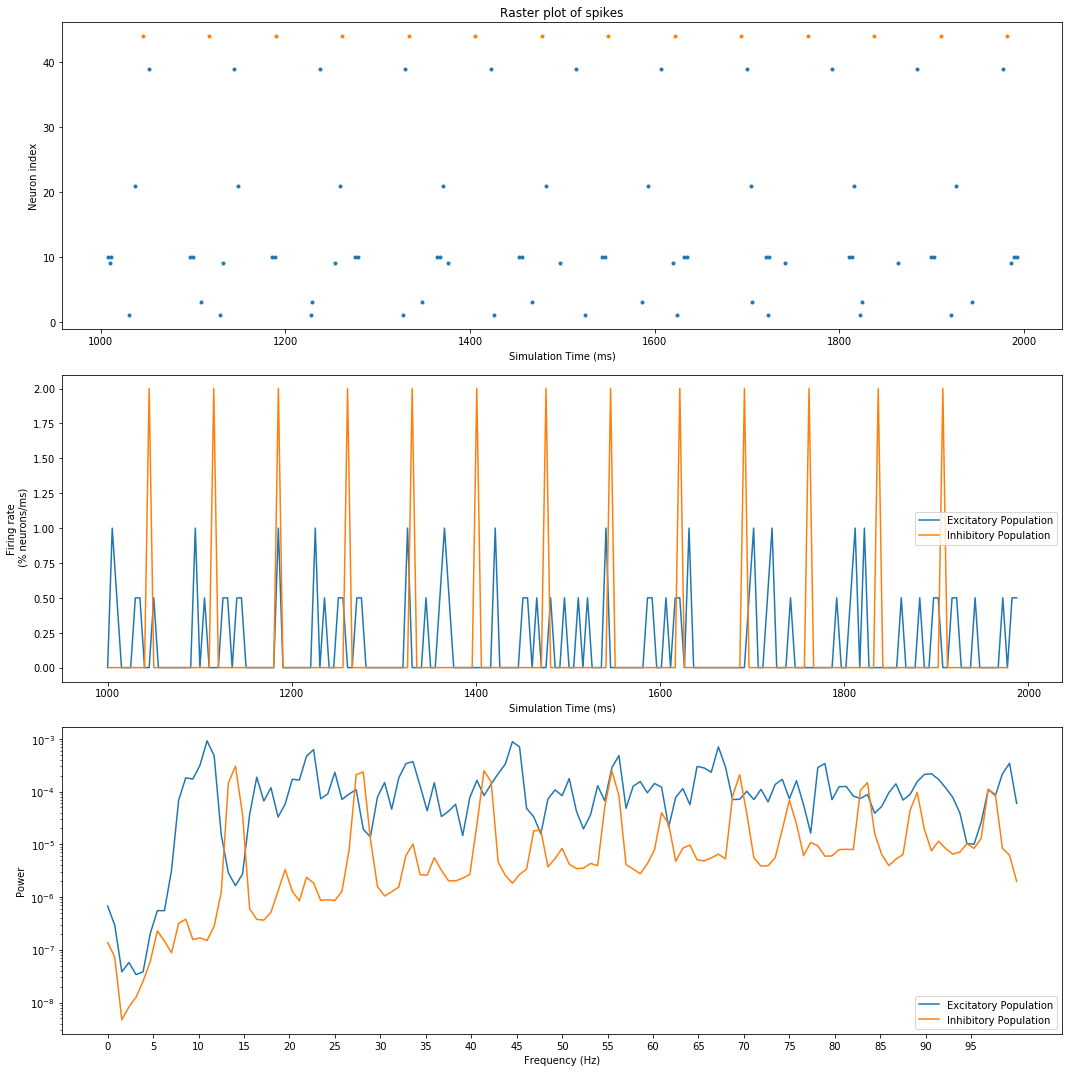

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 1, 1, 5)
378 exc spikes, 78 inh spikes


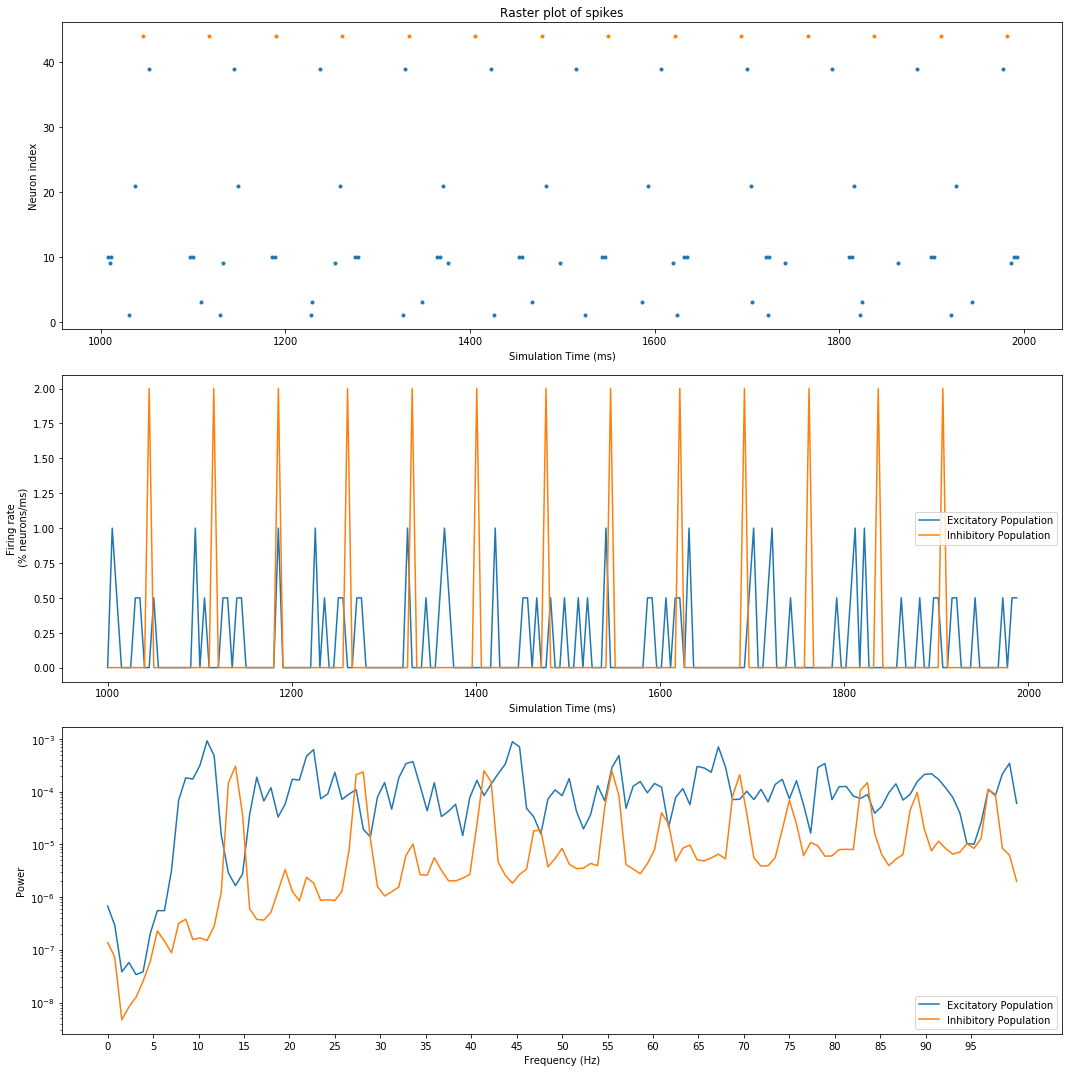

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 1, 1, 10)
378 exc spikes, 78 inh spikes


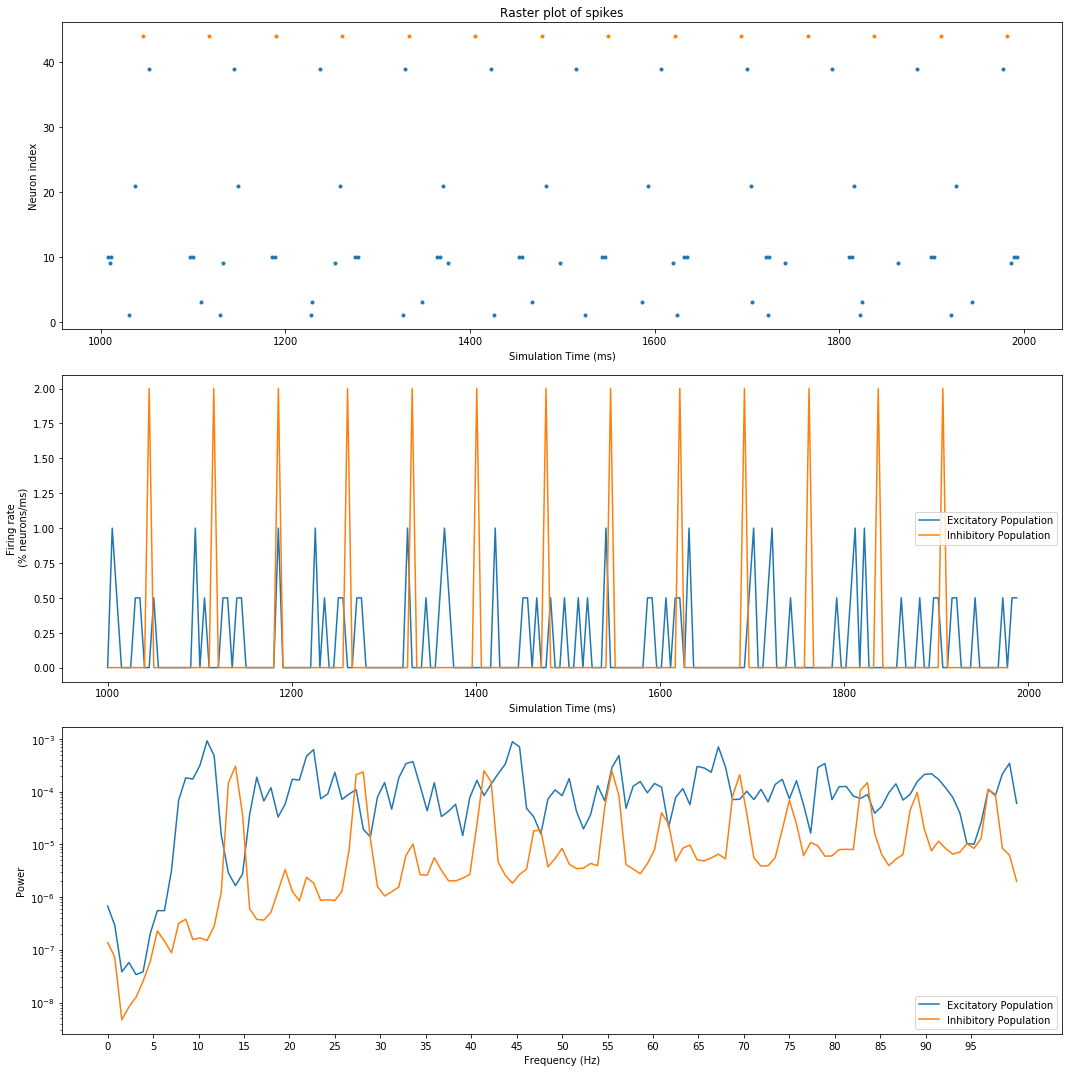

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 1, 5, 1)
378 exc spikes, 78 inh spikes


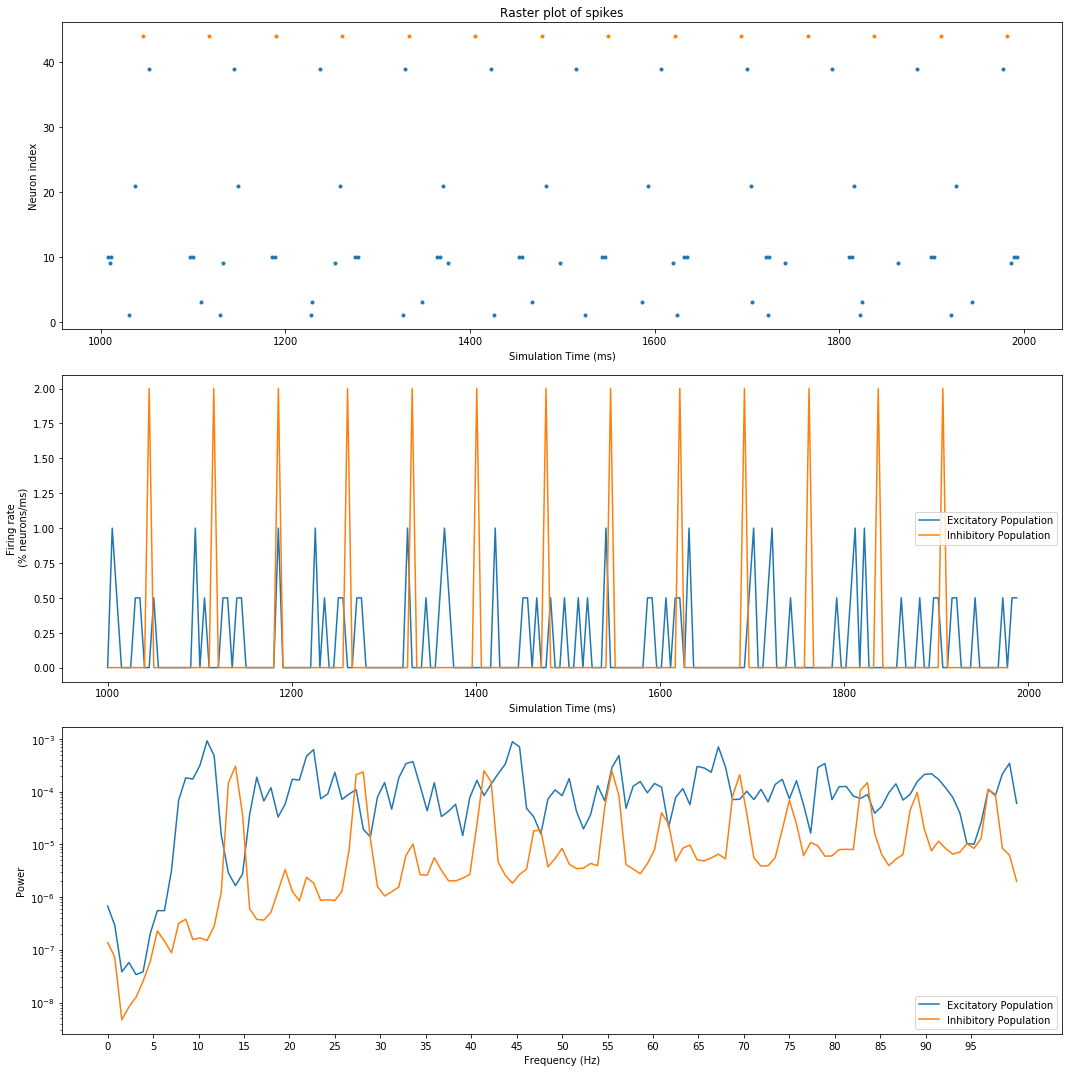

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 1, 5, 5)
378 exc spikes, 78 inh spikes


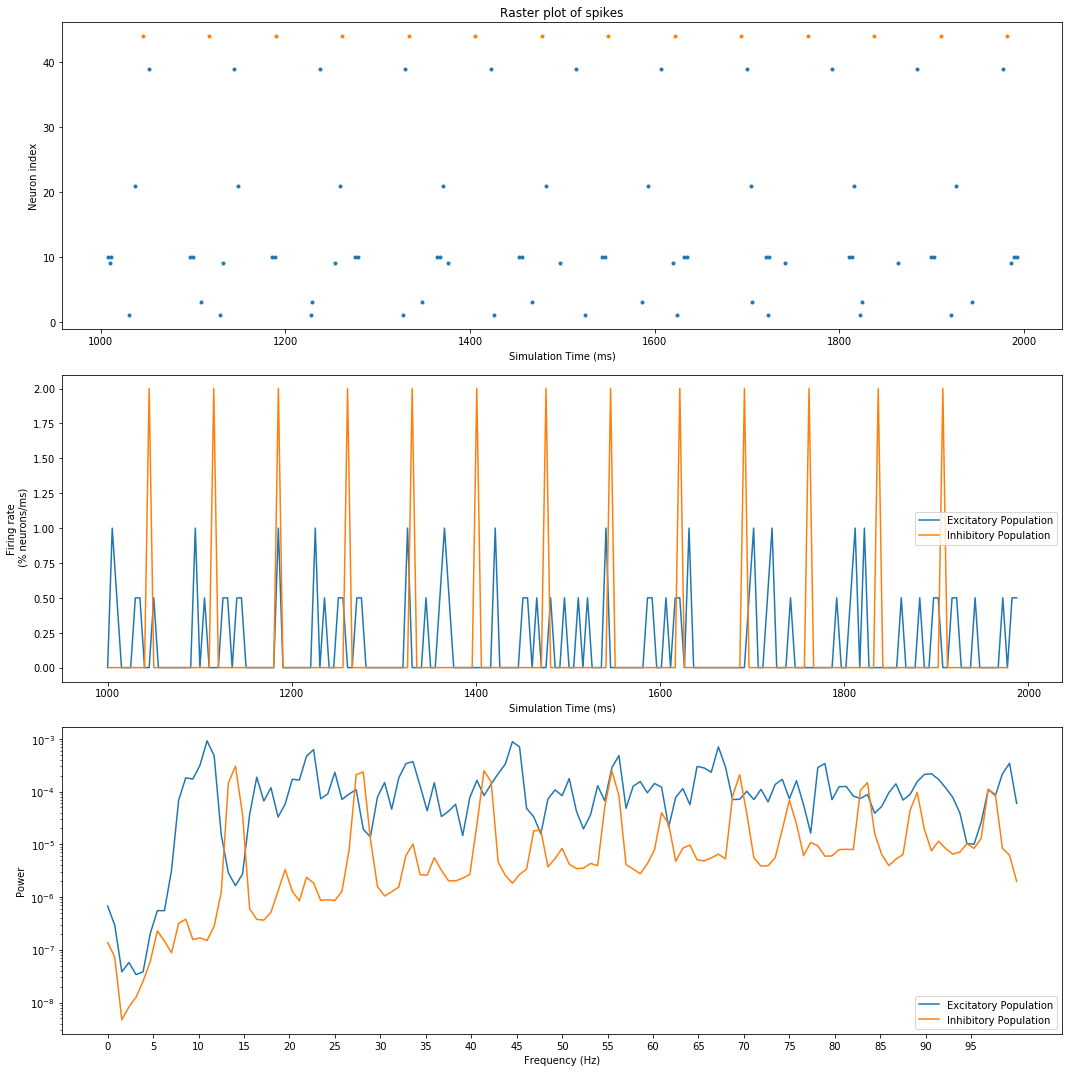

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 1, 5, 10)
378 exc spikes, 78 inh spikes


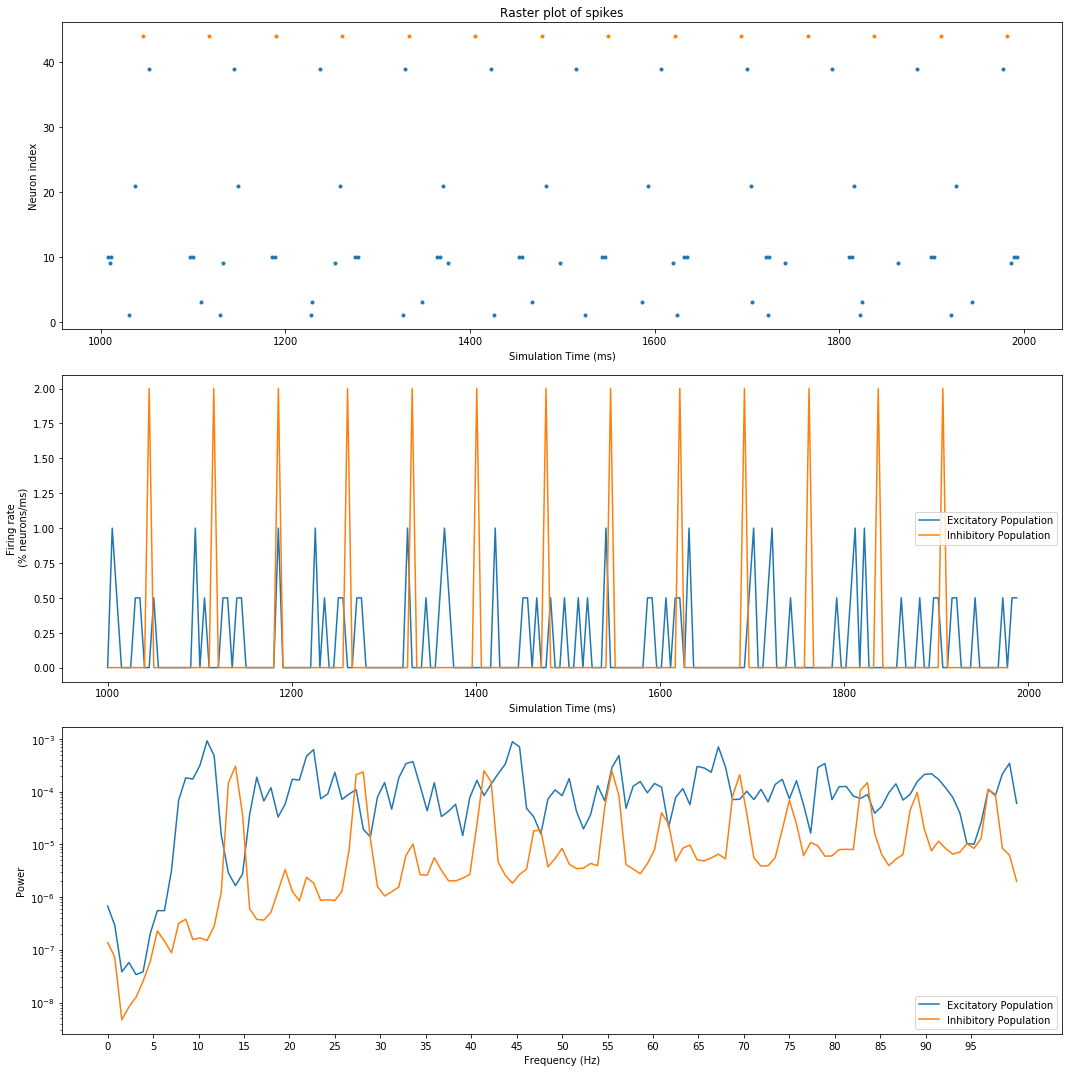

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 1, 10, 1)
378 exc spikes, 78 inh spikes


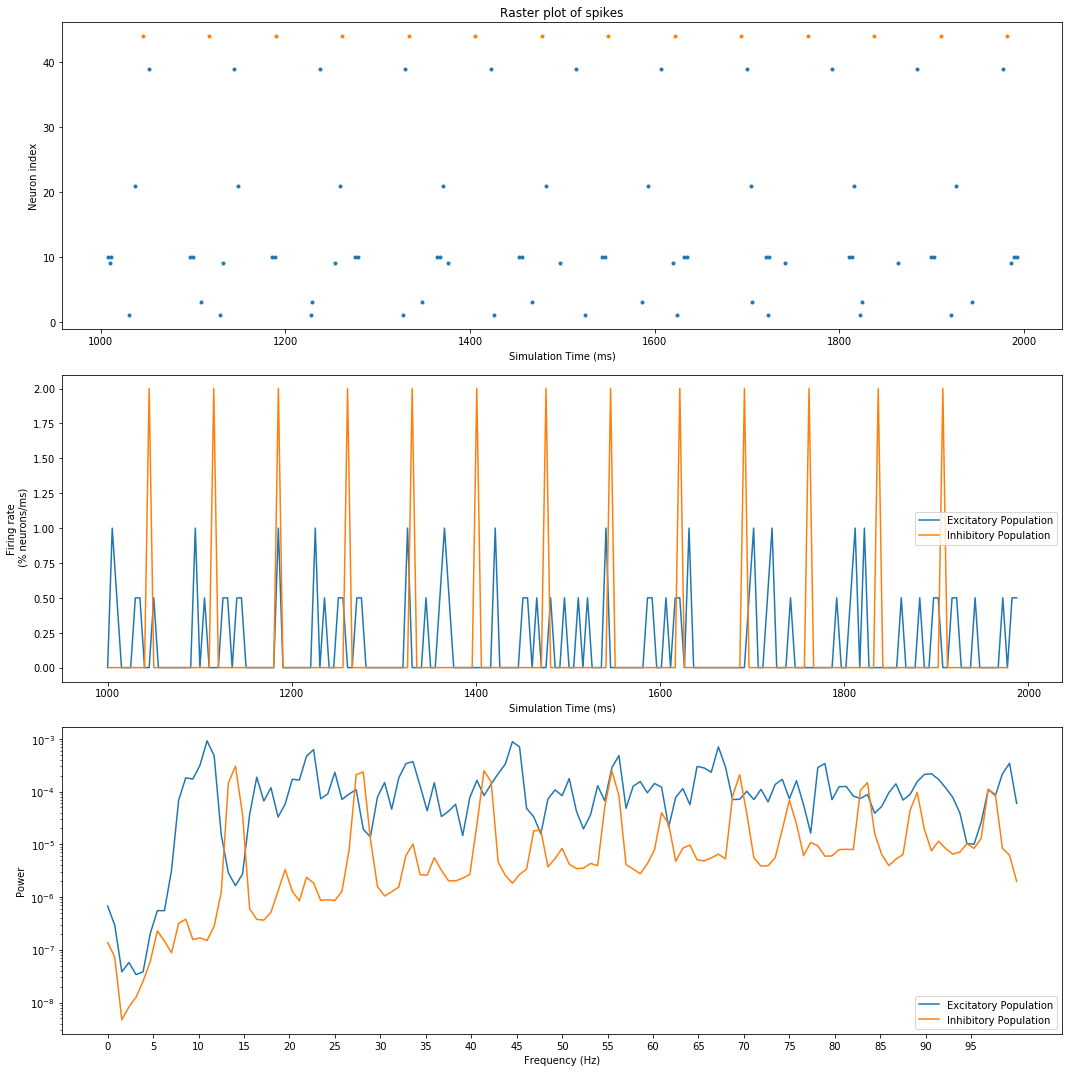

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 1, 10, 5)
378 exc spikes, 78 inh spikes


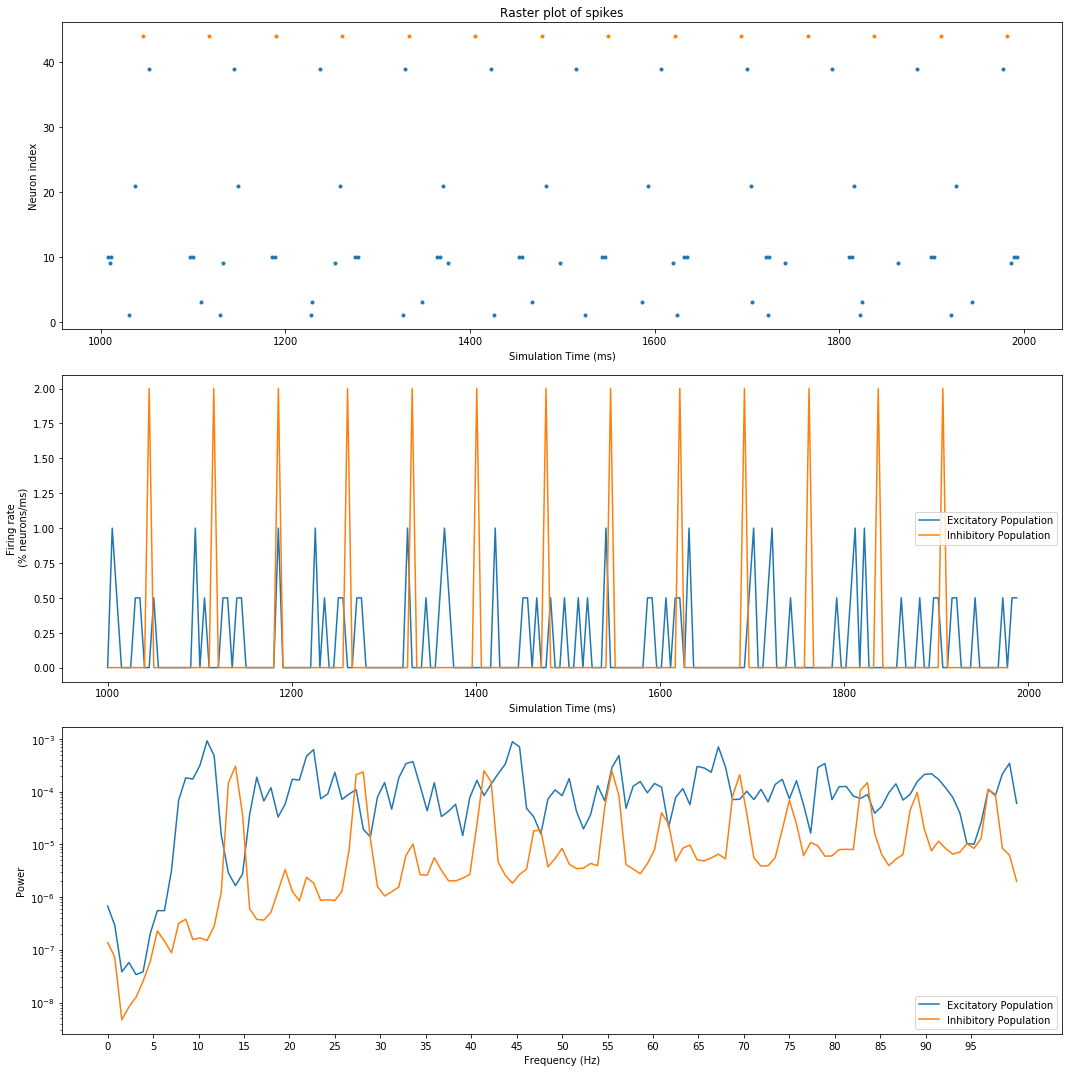

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 1, 10, 10)
378 exc spikes, 78 inh spikes


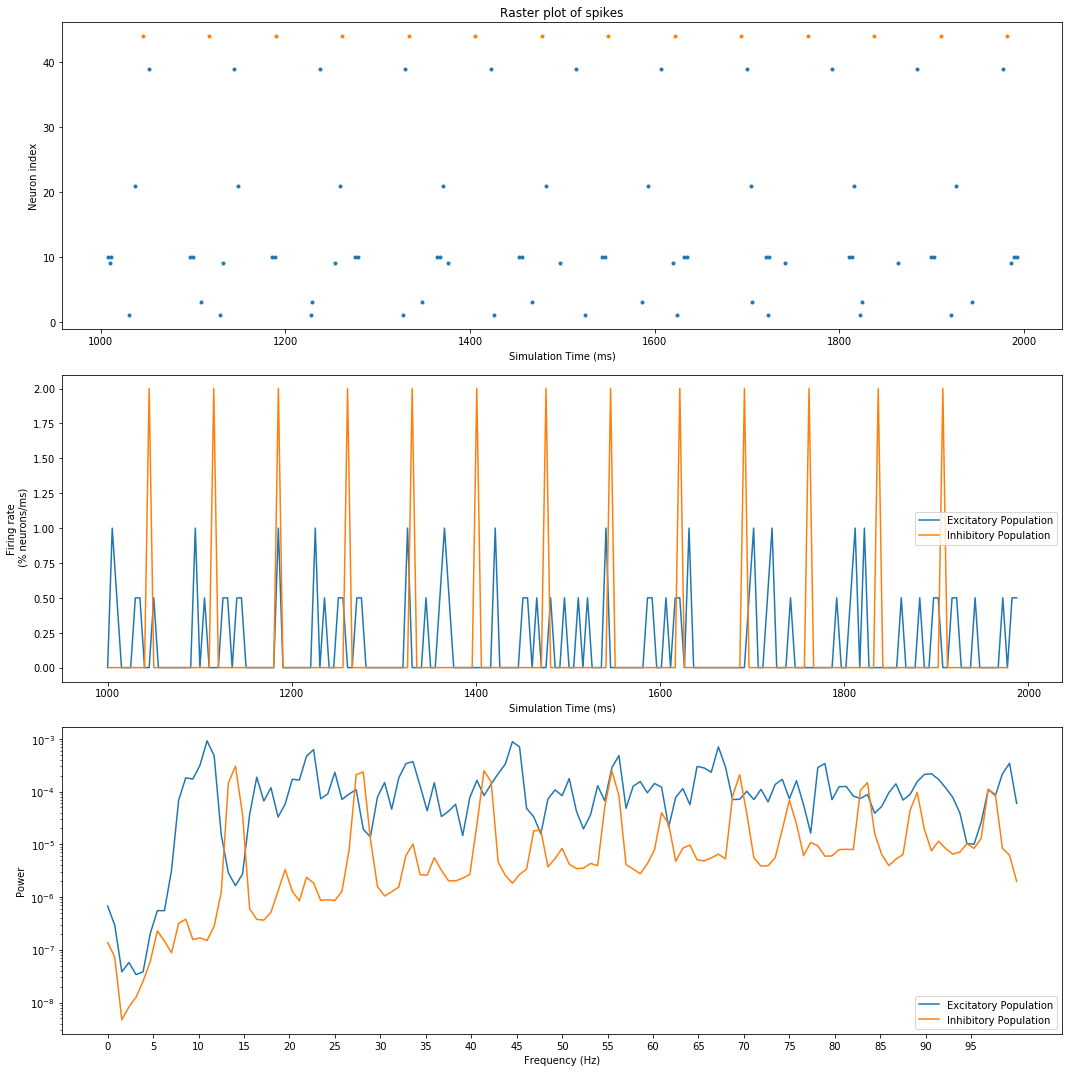

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 5, 1, 1)
378 exc spikes, 78 inh spikes


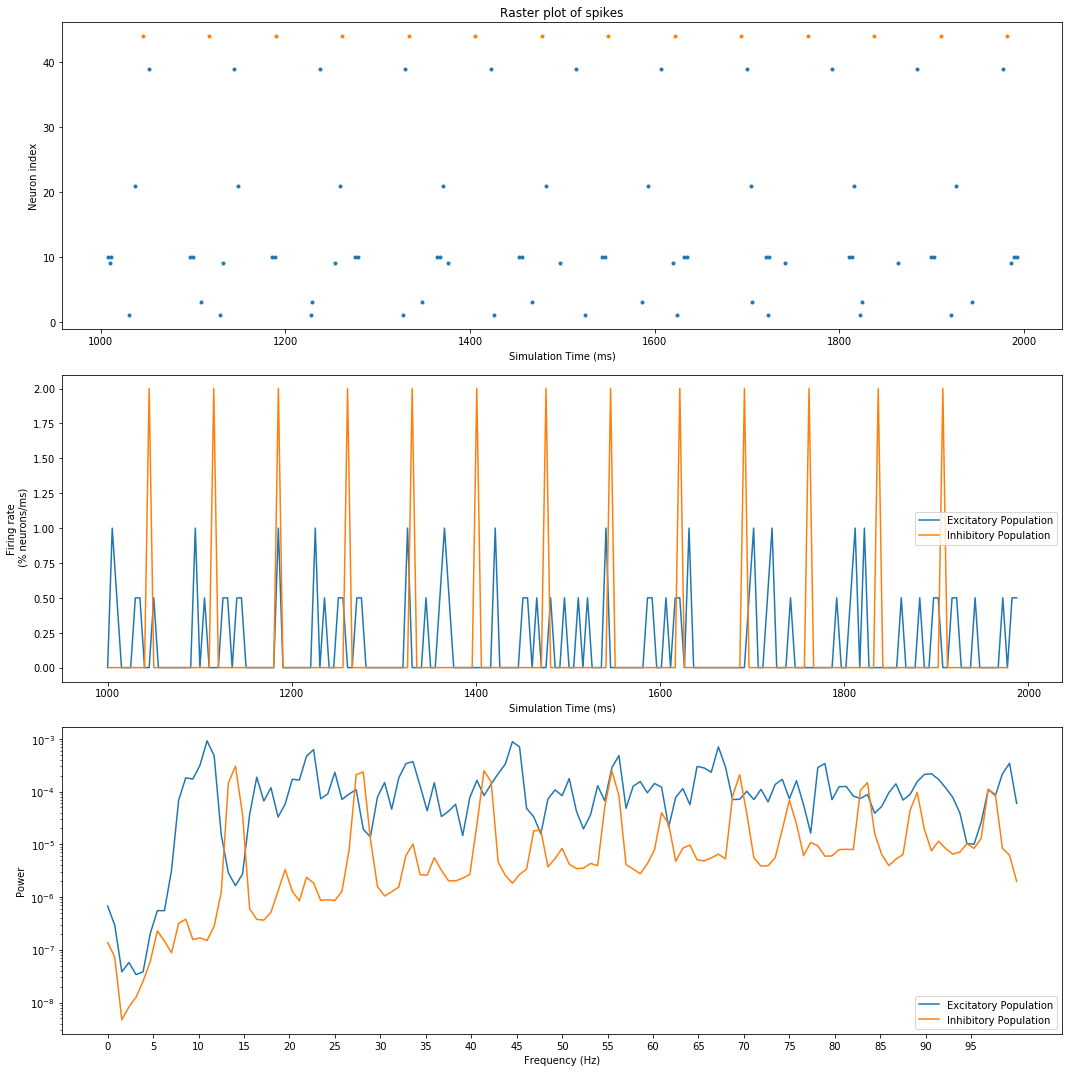

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 5, 1, 5)
378 exc spikes, 78 inh spikes


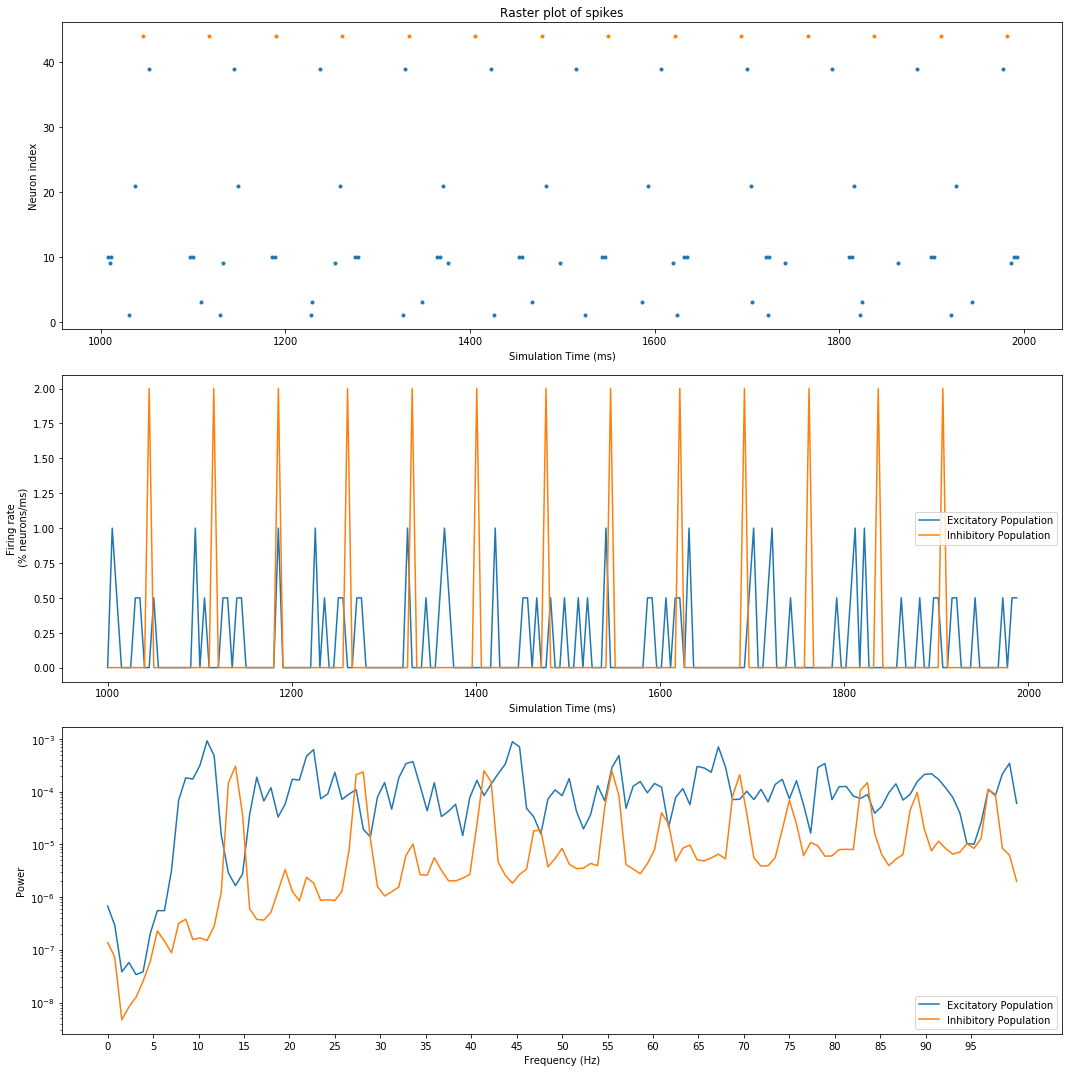

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 5, 1, 10)
378 exc spikes, 78 inh spikes


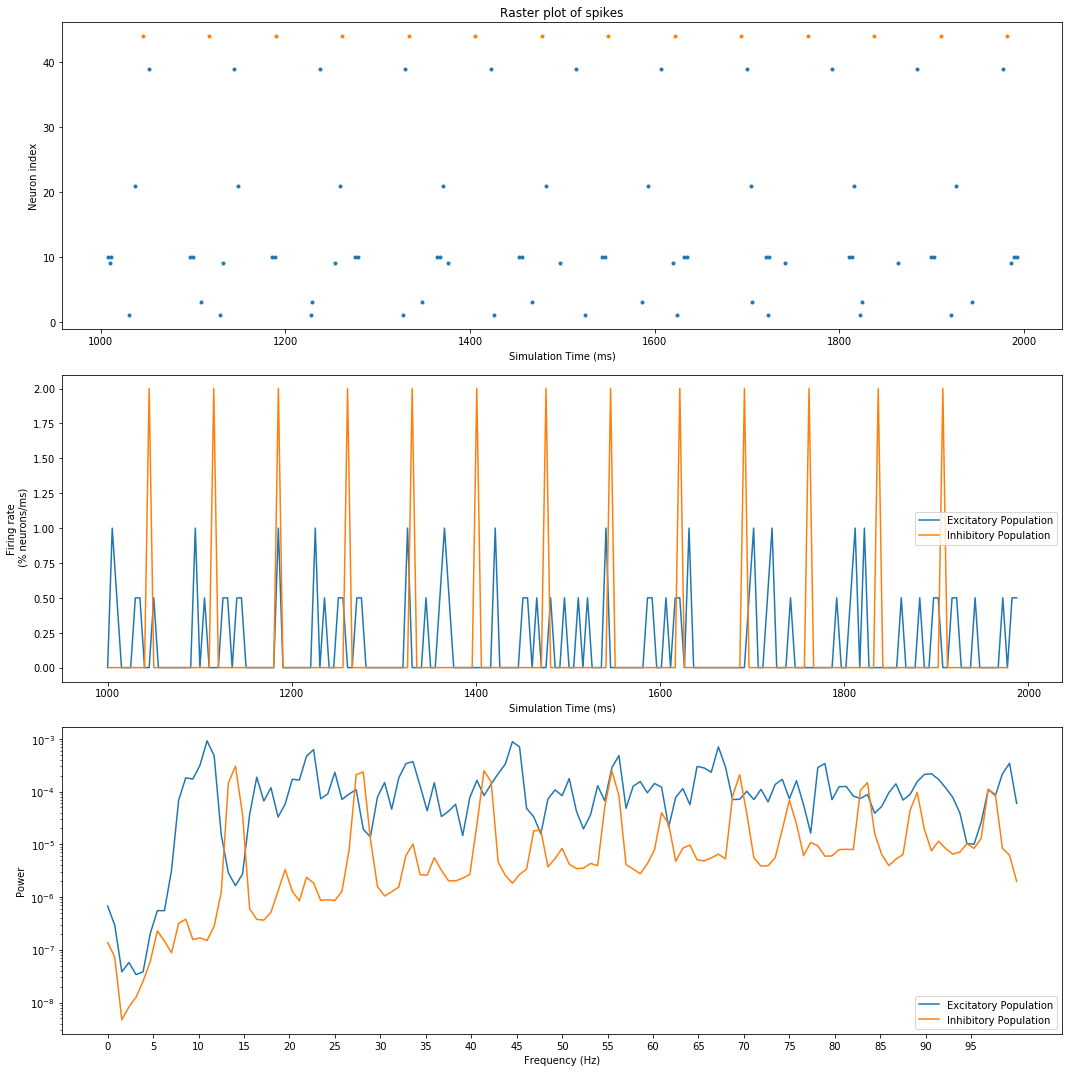

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 5, 5, 1)
378 exc spikes, 78 inh spikes


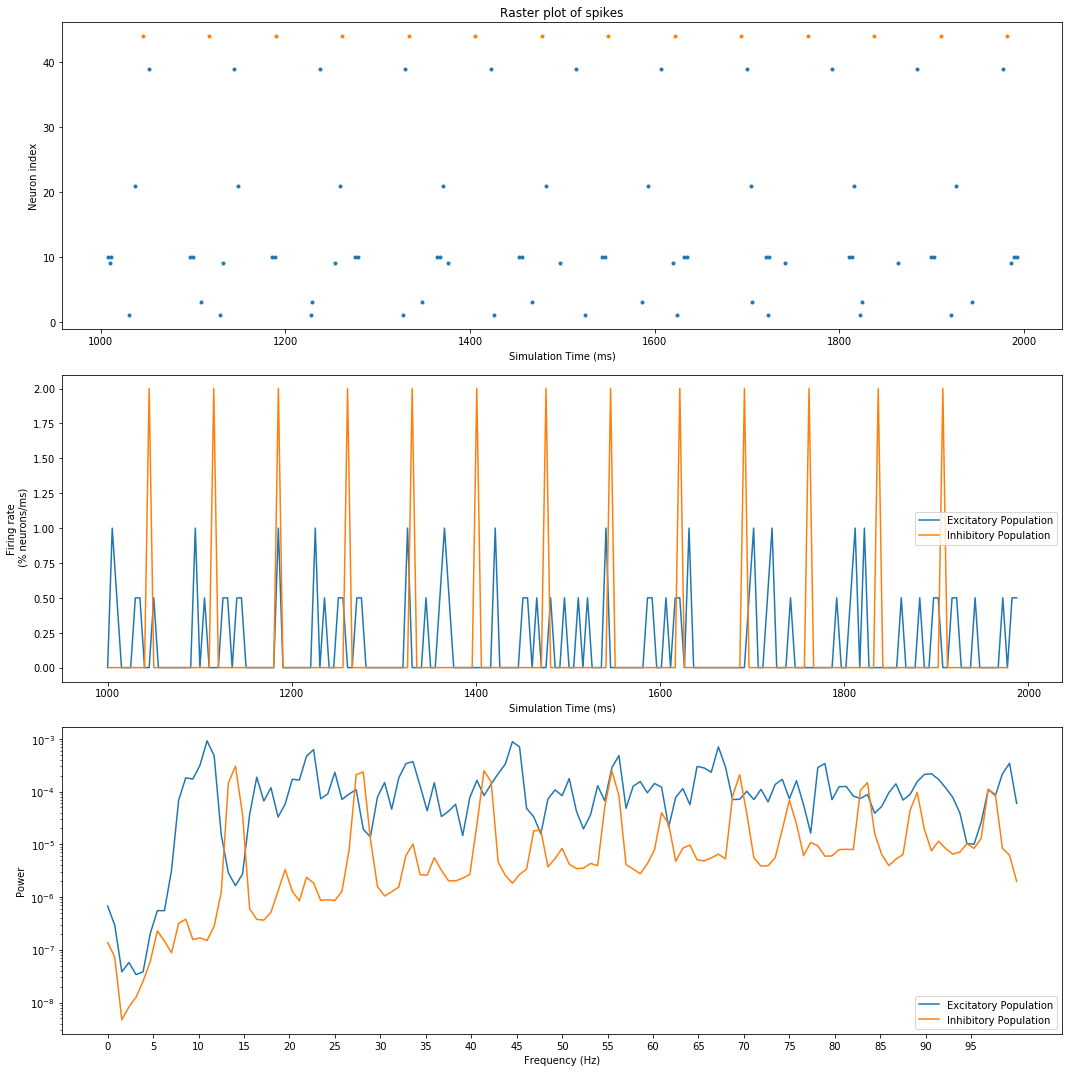

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 5, 5, 5)
378 exc spikes, 78 inh spikes


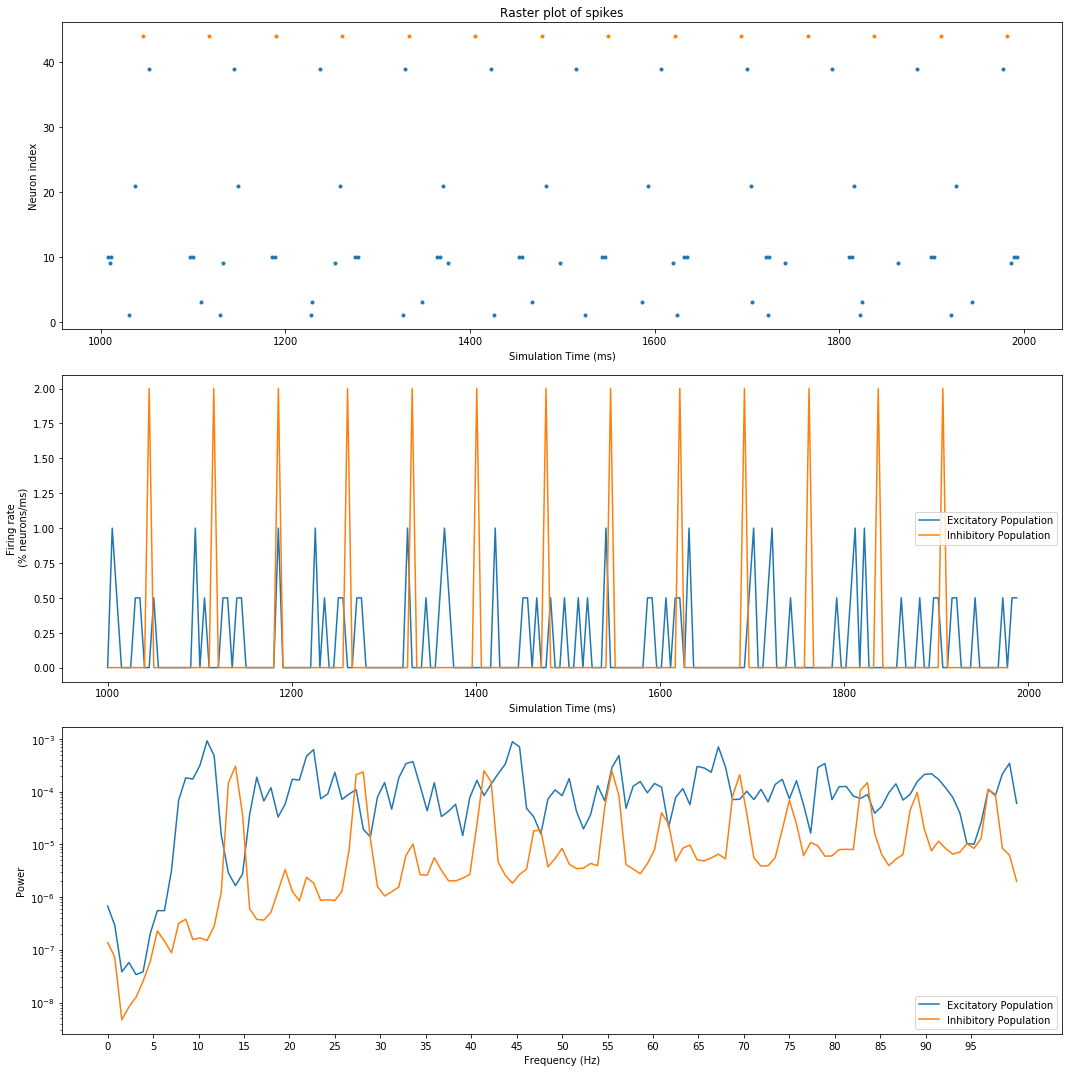

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 5, 5, 10)
378 exc spikes, 78 inh spikes


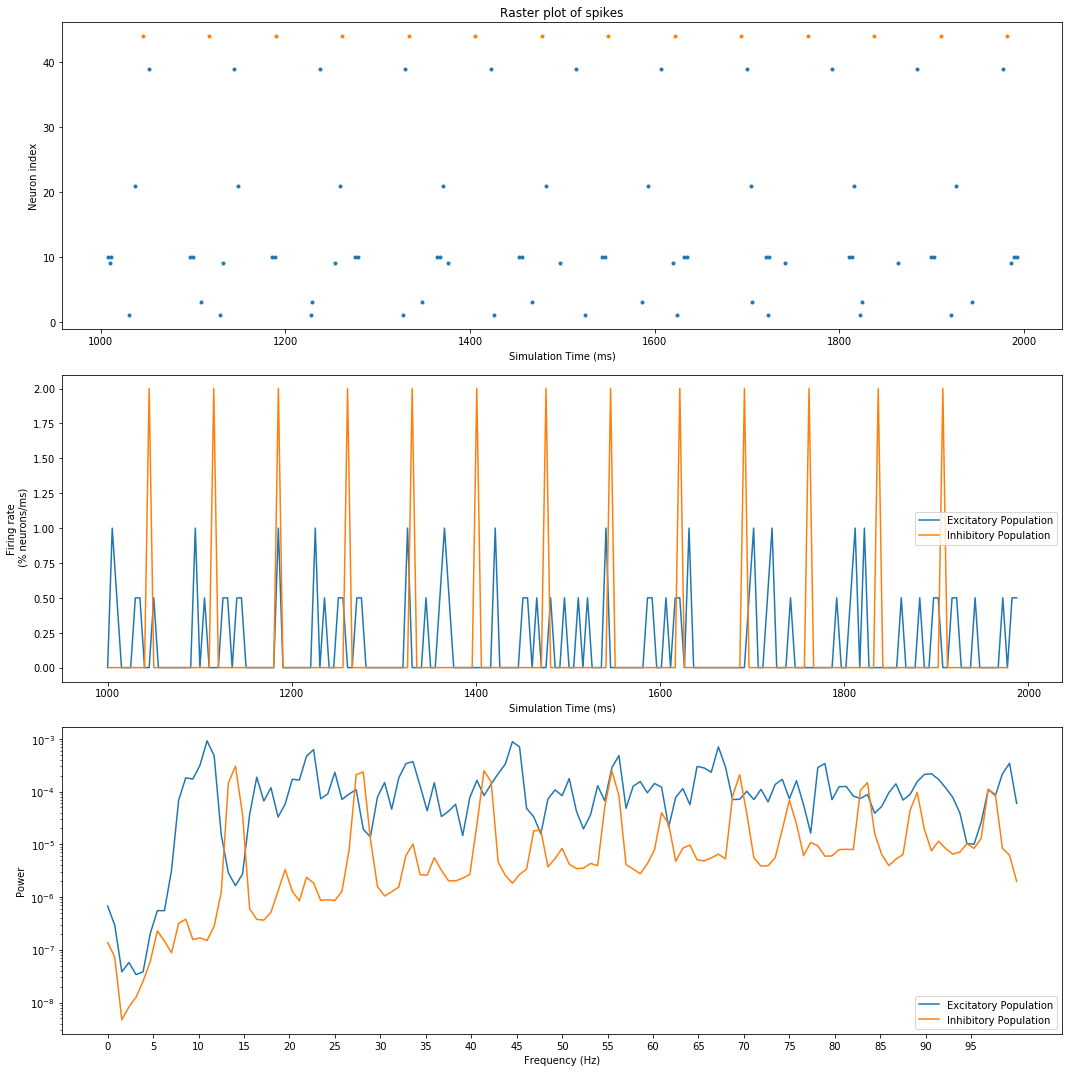

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 5, 10, 1)
378 exc spikes, 78 inh spikes


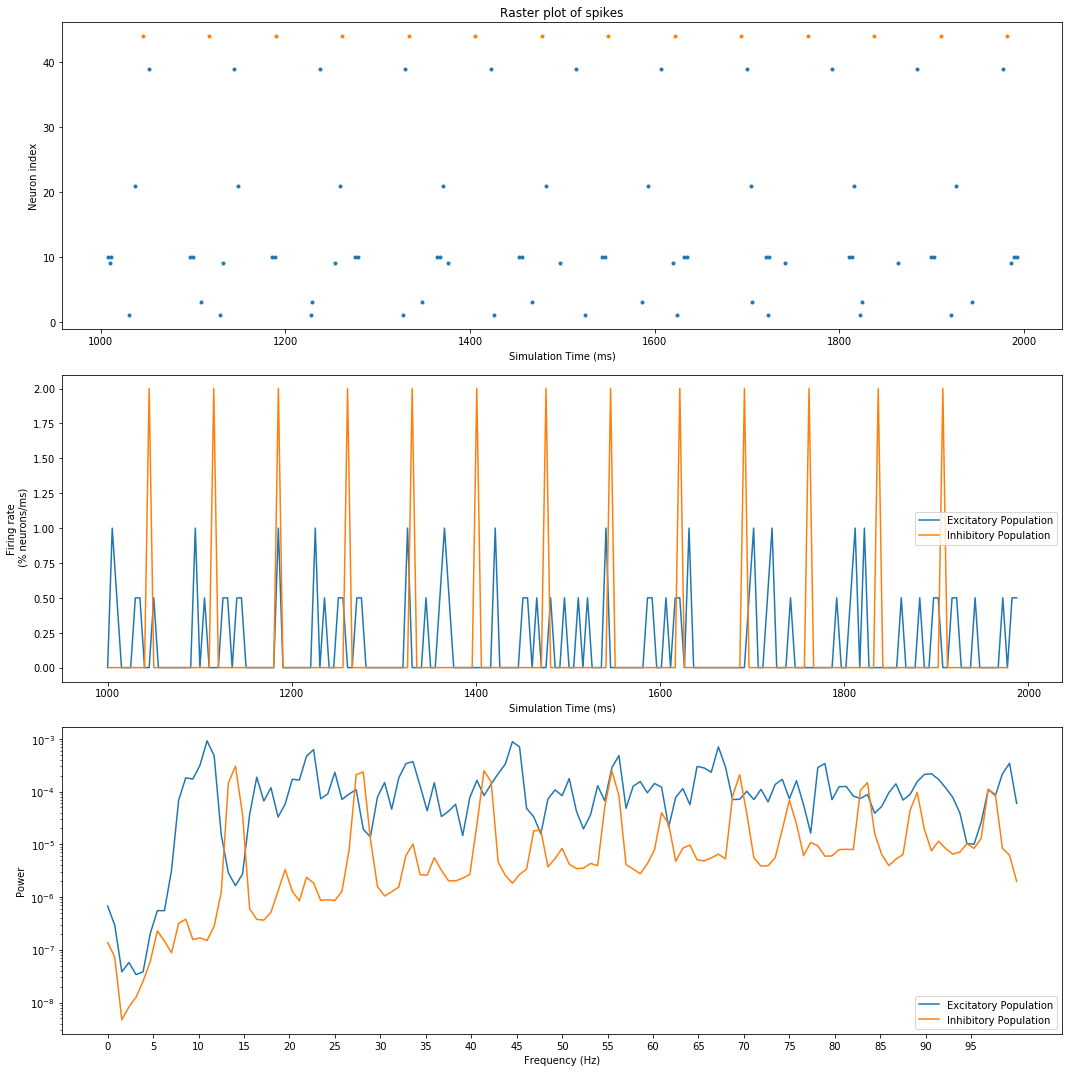

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 5, 10, 5)
378 exc spikes, 78 inh spikes


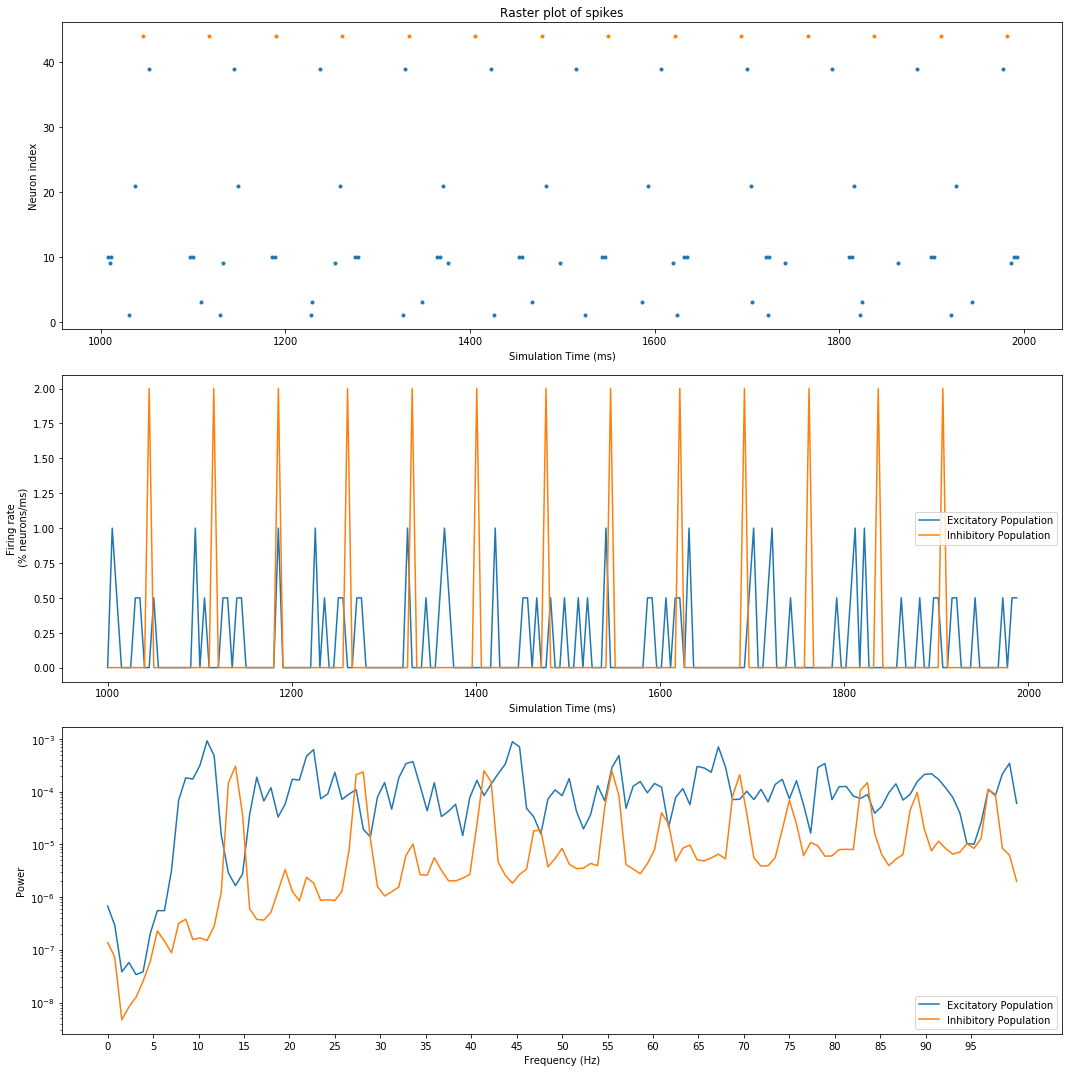

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 5, 10, 10)
378 exc spikes, 78 inh spikes


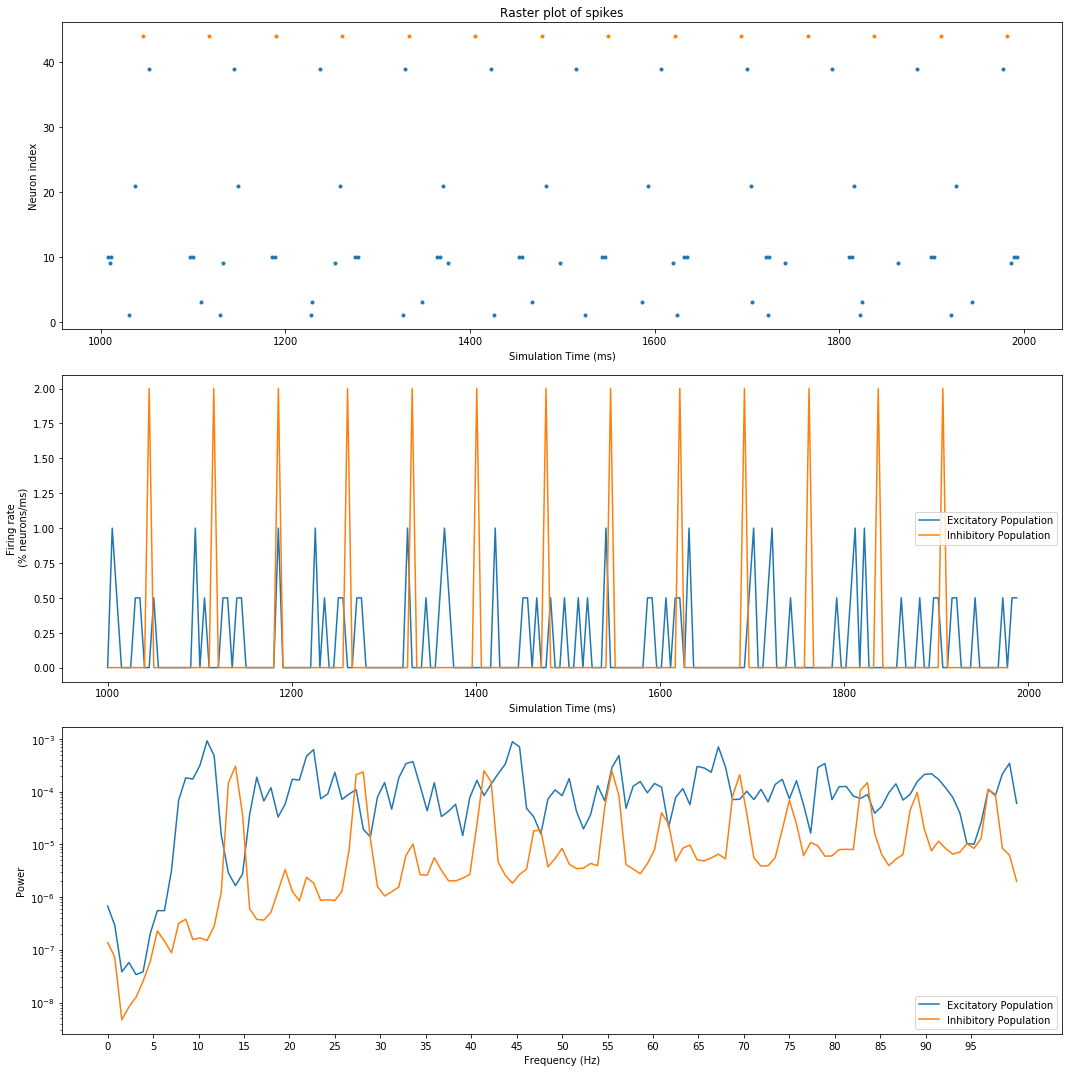

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 10, 1, 1)
378 exc spikes, 78 inh spikes


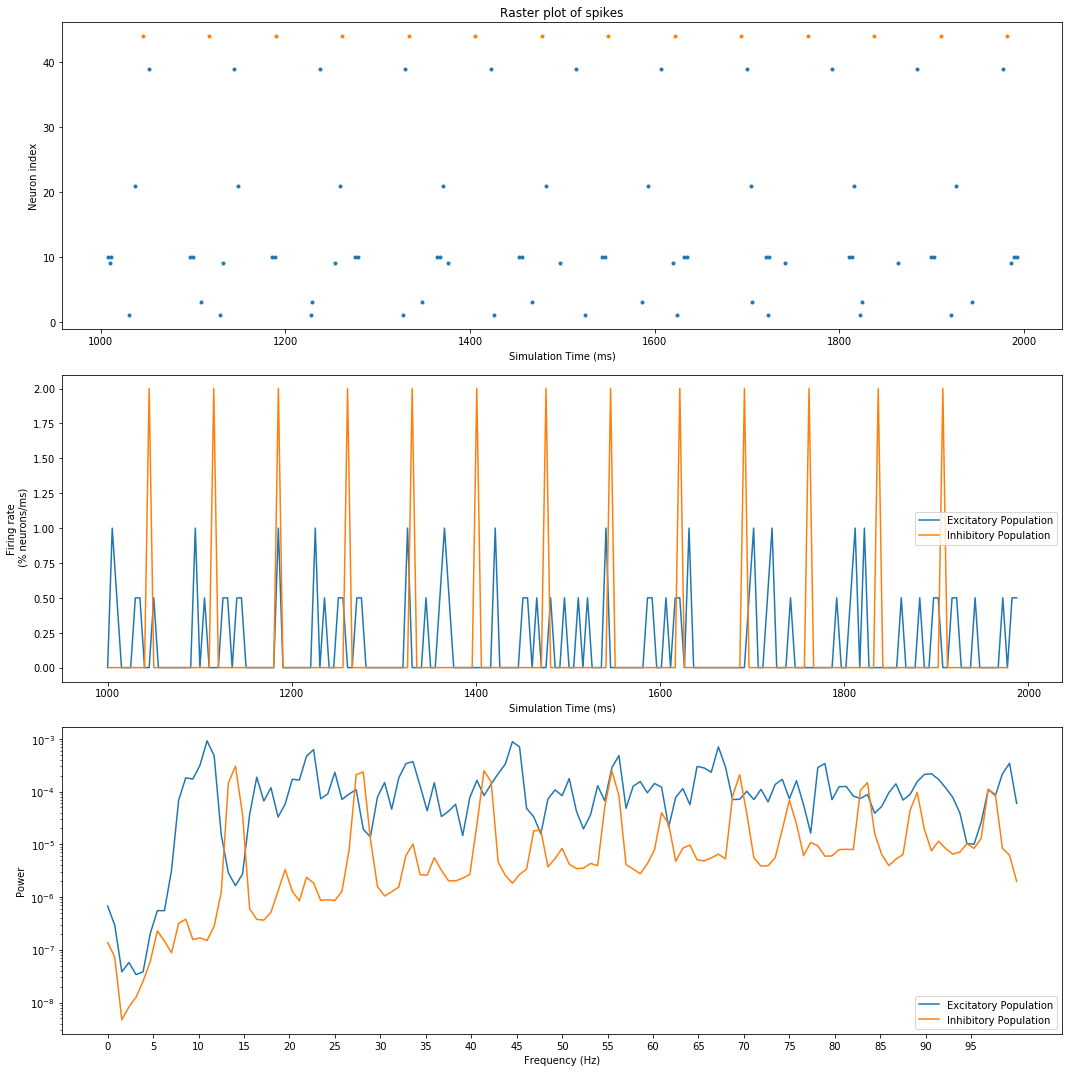

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 10, 1, 5)
378 exc spikes, 78 inh spikes


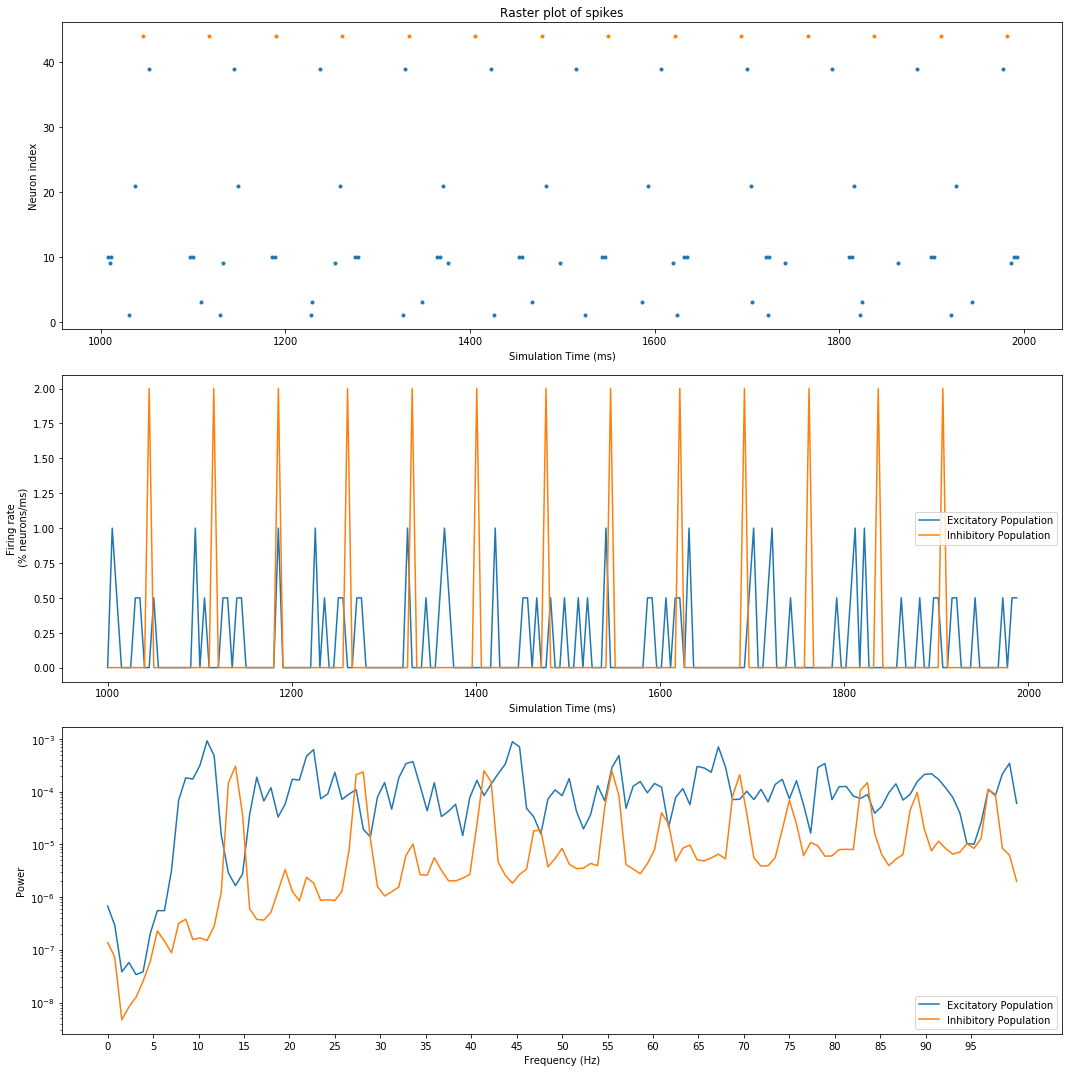

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 10, 1, 10)
378 exc spikes, 78 inh spikes


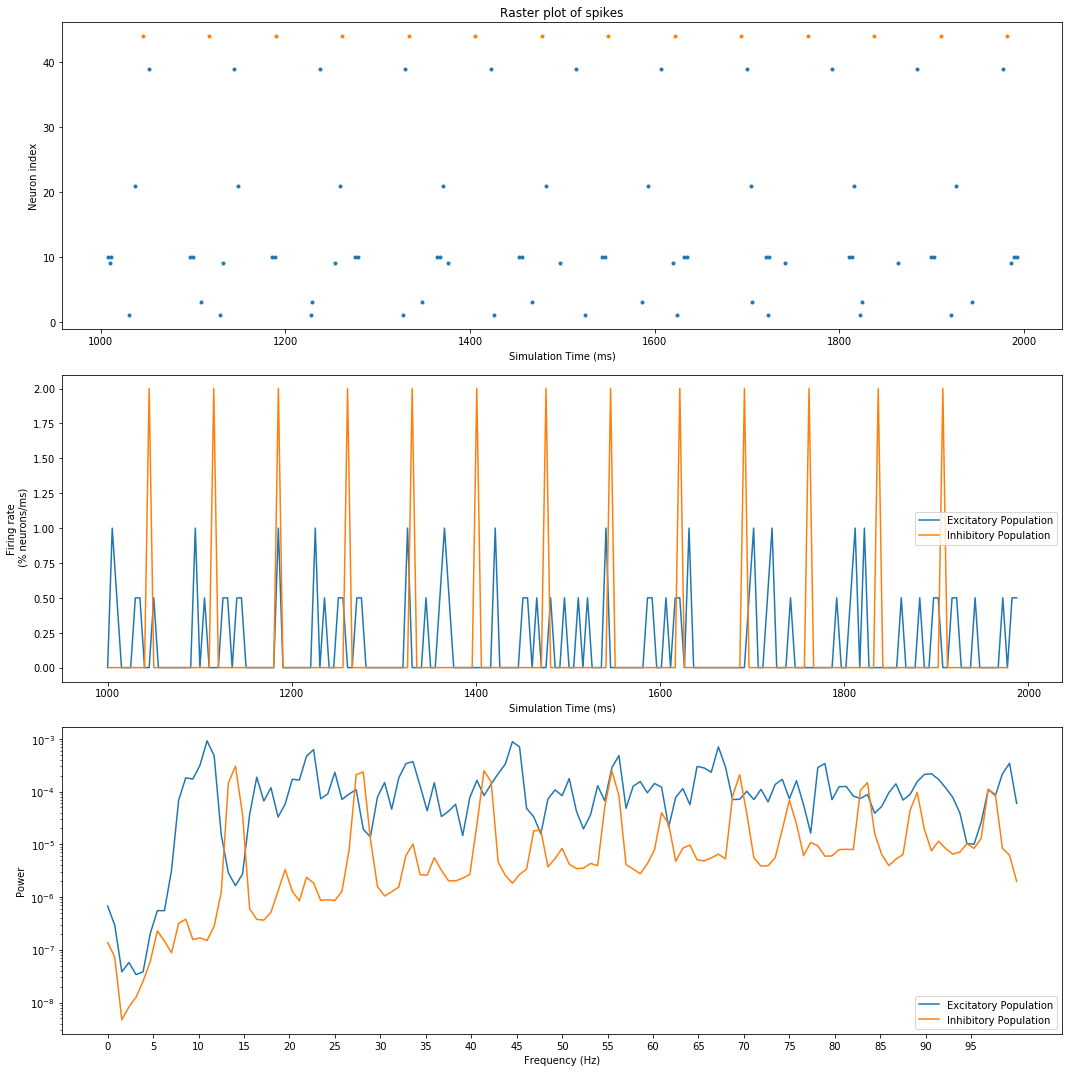

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 10, 5, 1)
378 exc spikes, 78 inh spikes


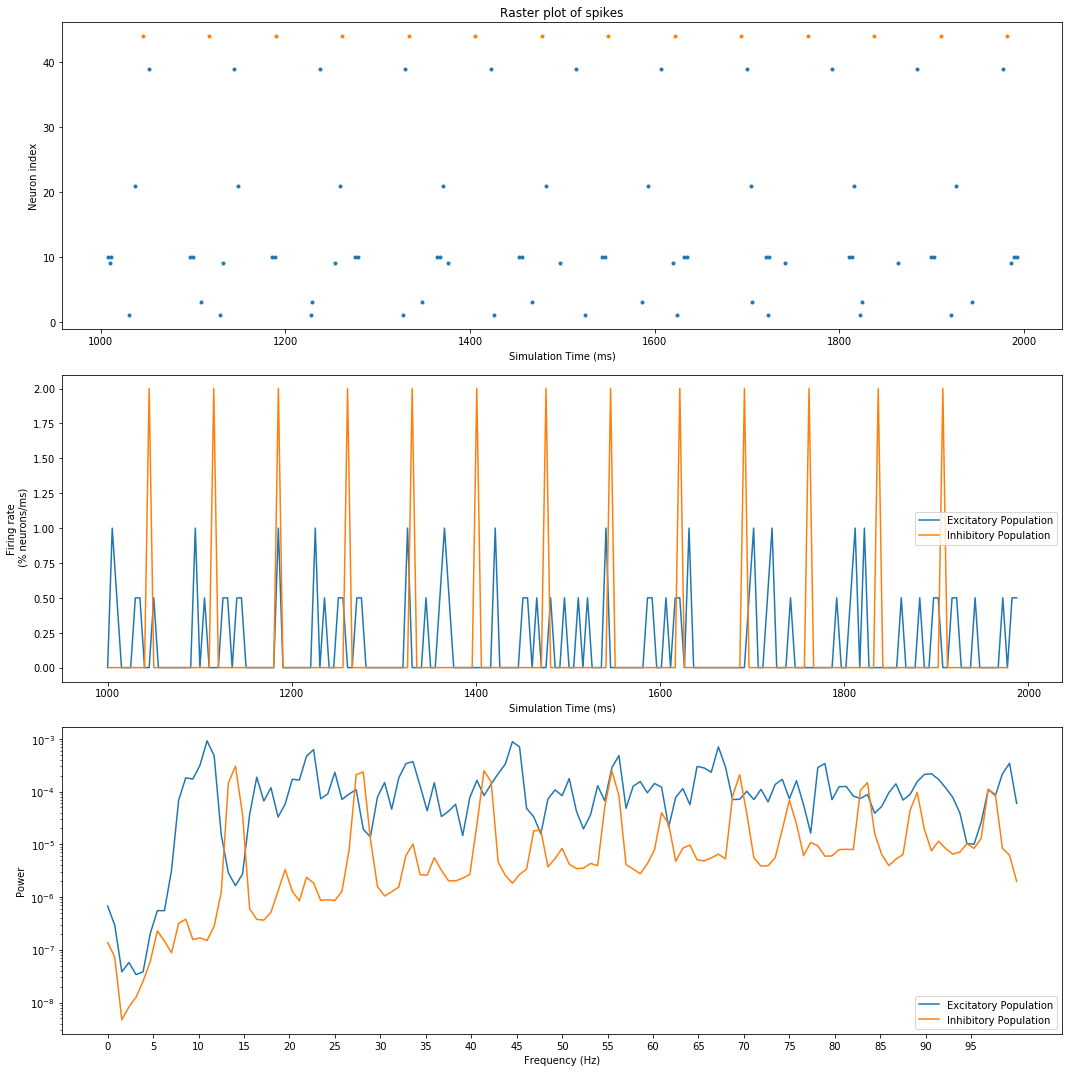

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 10, 5, 5)
378 exc spikes, 78 inh spikes


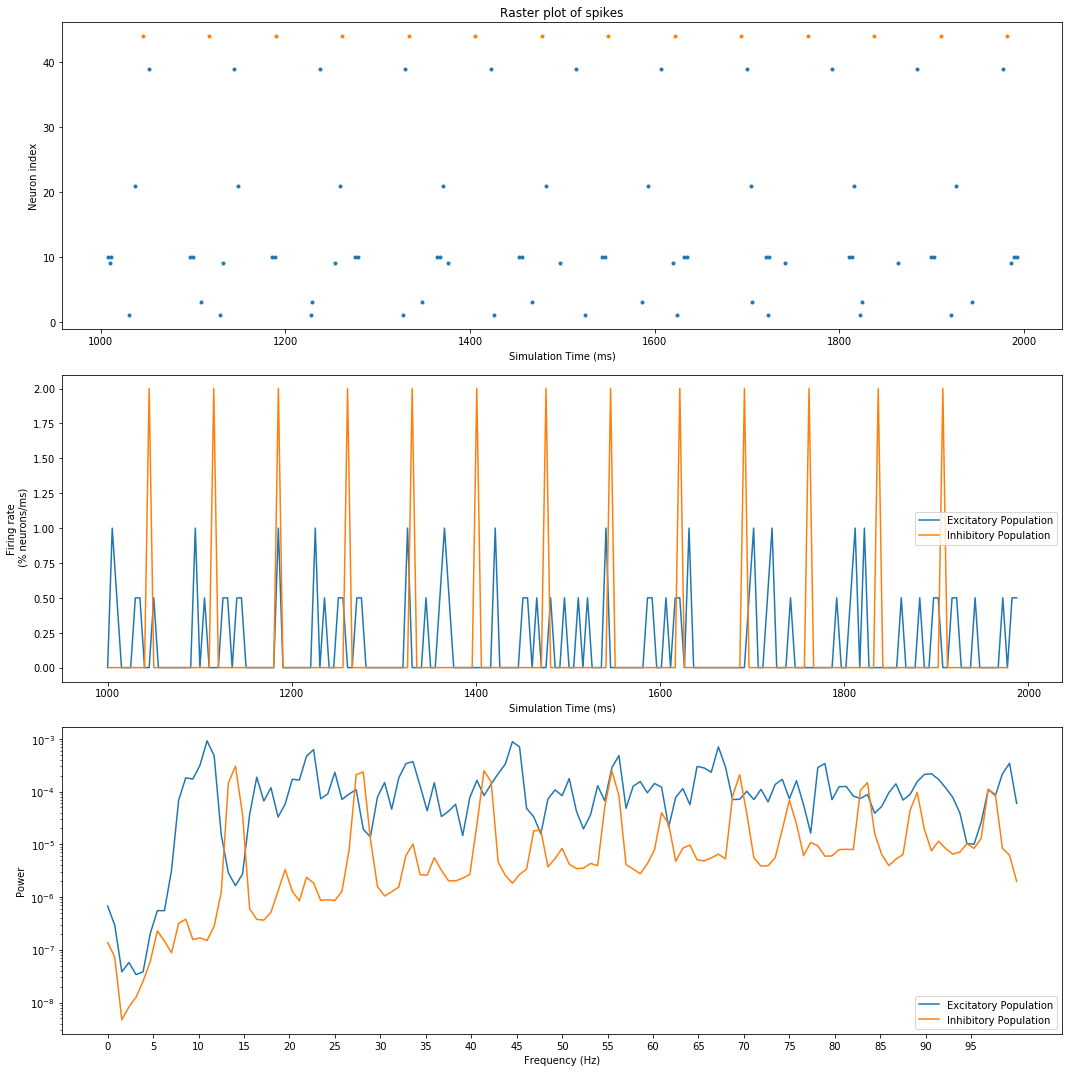

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 10, 5, 10)
378 exc spikes, 78 inh spikes


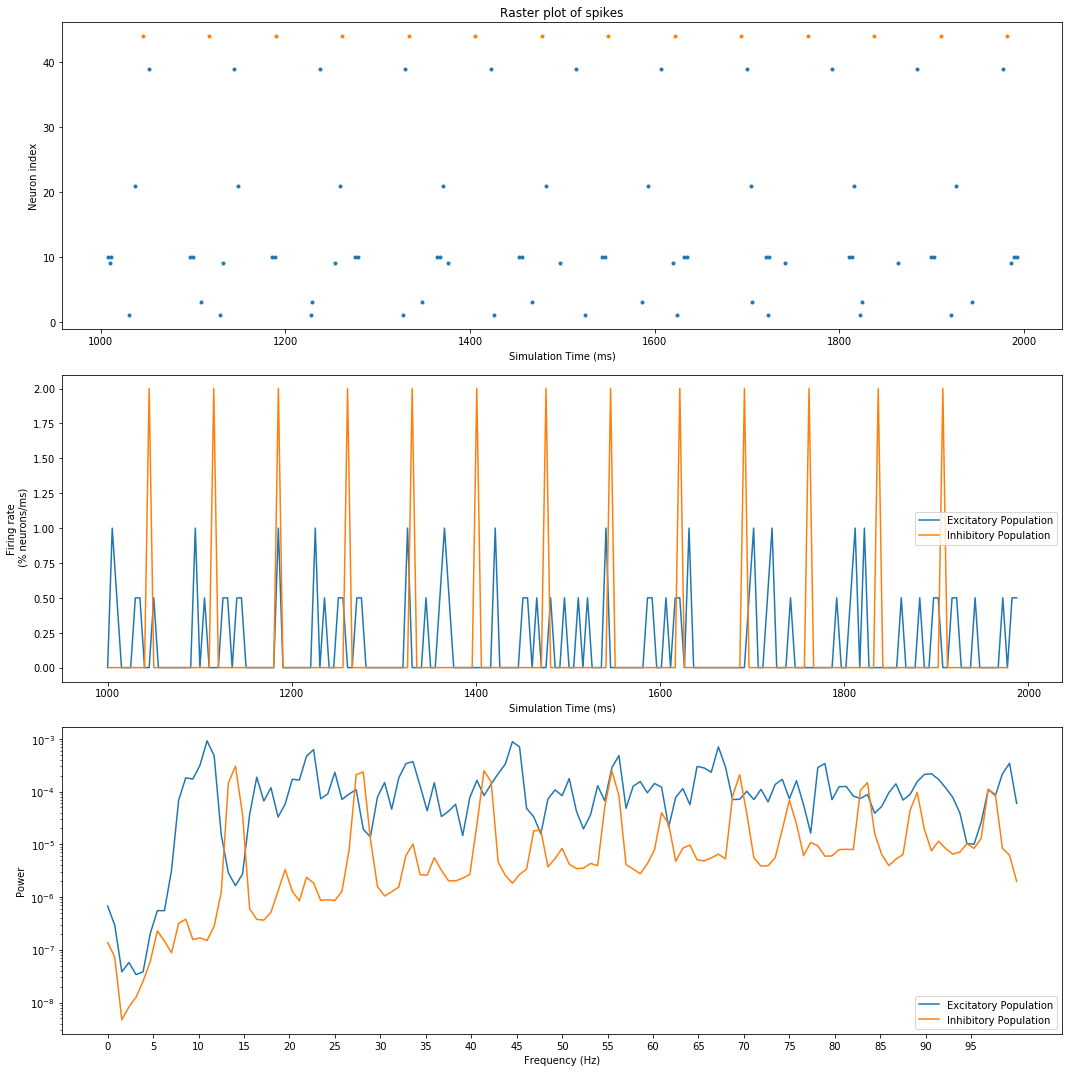

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 10, 10, 1)
378 exc spikes, 78 inh spikes


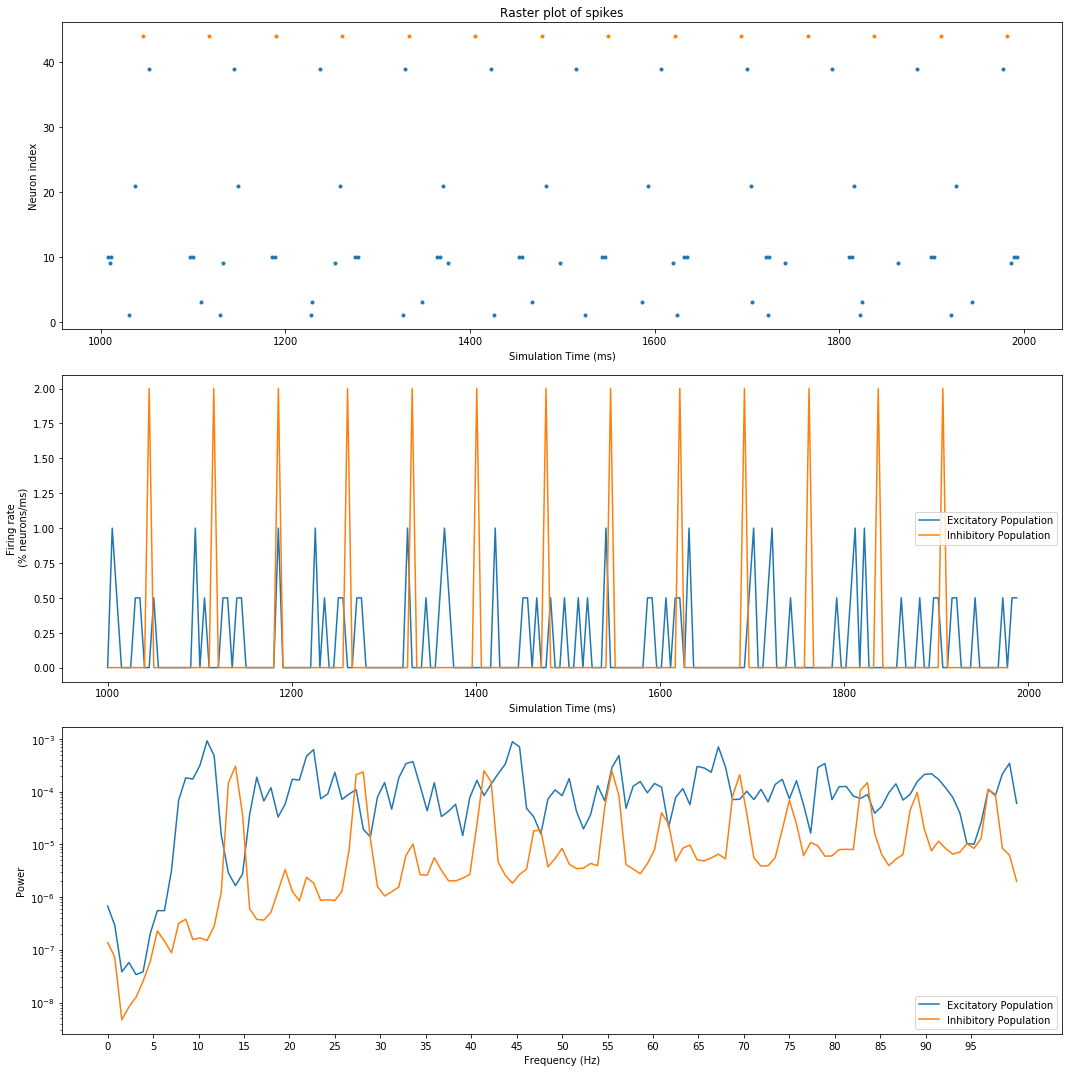

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 10, 10, 5)
378 exc spikes, 78 inh spikes


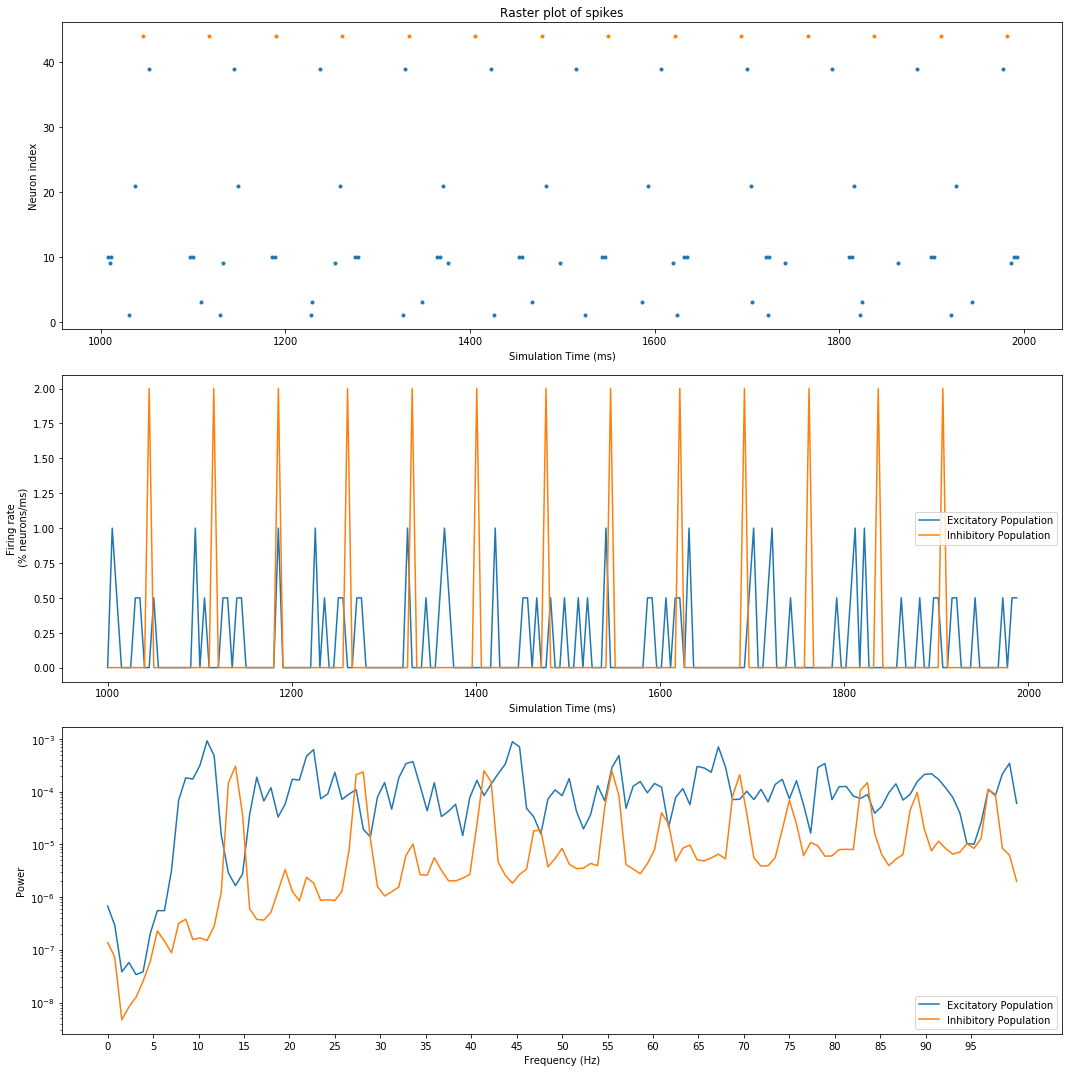

(0.0, 0.0, 0.0, 0.0, 0.40000000000000002, 0.40000000000000002, 10, 10, 10)
378 exc spikes, 78 inh spikes


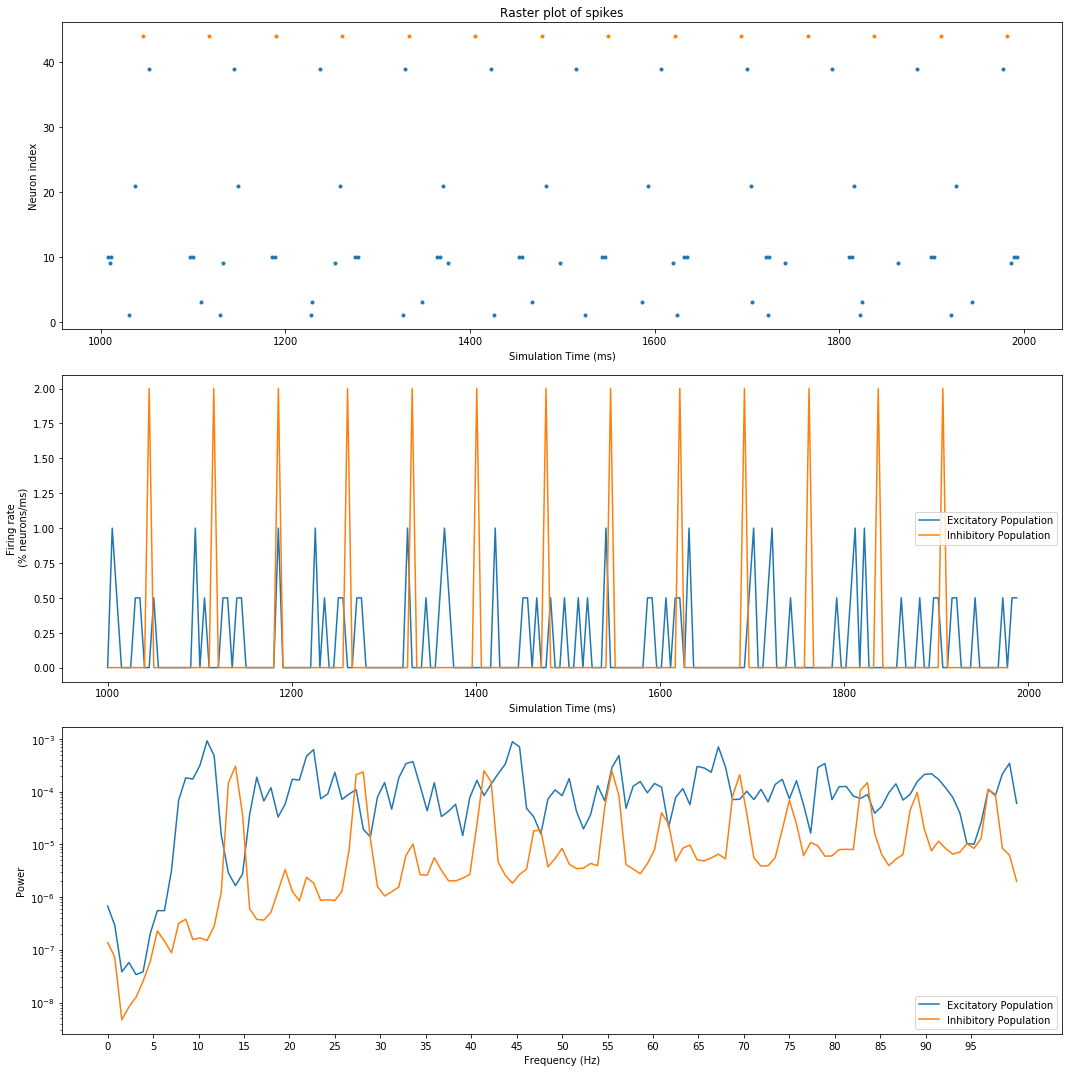

In [17]:

args = itertools.product(a, b, c, d, exconn, inconn, delays, delays, delays)
for arg, data in zip(args, results):
    print(arg)
    plot_stuff(data)

In [2]:
import experiment_9_thalamus_ping_module as th_exp


In [53]:
th_data = th_exp.run_simulation()

Setting up synapses:
	EX_EX_SYN... (11,853 synapses) [0.06s]
	EX_IN_SYN... (3,940 synapses) [6.84s]
	IN_EX_SYN... (3,940 synapses) [0.04s]
	IN_IN_SYN... (1,001 synapses) [0.03s]
 [7.00s]
Running sym...  [7.92s]


In [54]:
th_data.update({
    'n_mod': 1,
    'n_ex_mod': th_data['n_ex'],
    'n_in_mod': th_data['n_in'],
})

201,799 exc spikes, 119,140 inh spikes
(0, 0, 50, 200)
[ 79  26  18 171  10 133 108 191  79 133]
[ 5 27 22 38 49 15 39 38 23 48]


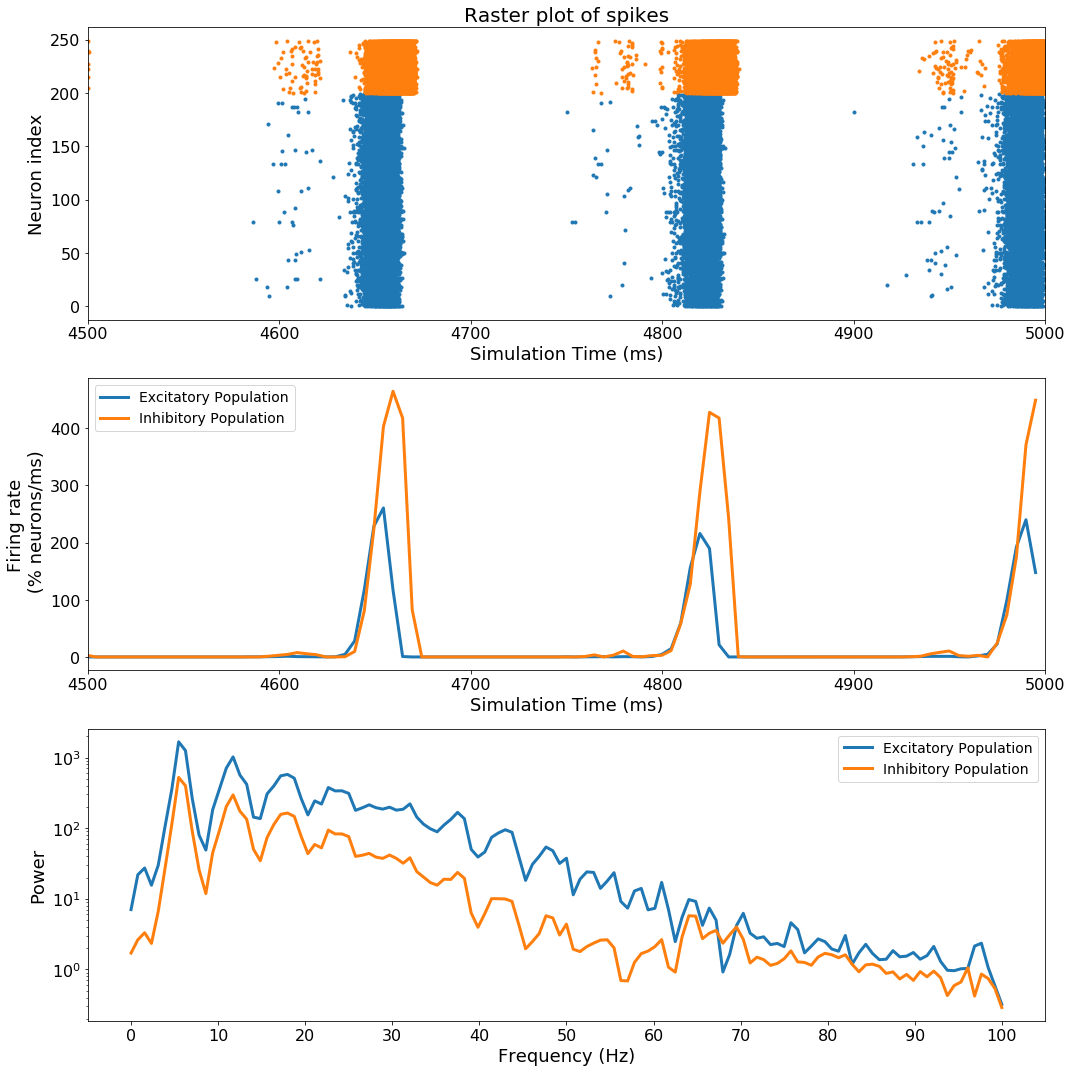

In [55]:
plot_stuff(th_data, start=4500, end=5000)


## Compare extreme values for intramodular synaptic weights and delays

In [38]:
t = time.time()
def ff(arg):
    w, d, sigma = arg
    return ex_9.run_simulation(
        exin_w=(w,sigma), inex_w=(w,sigma), inin_w=(w,sigma),
        exin_d=(d,sigma), inex_d=(d,sigma), inin_d=(d,sigma)
    )
    
weights = [5, 15]
delays = [2, 4, 6, 10]
sigma = [2]
args = list(itertools.product(delays, weights, sigma))
p = Pool(6)
results = p.map(ff, args)
print("Time: {}".format(time.time() - t))


Time: 12.9251630306


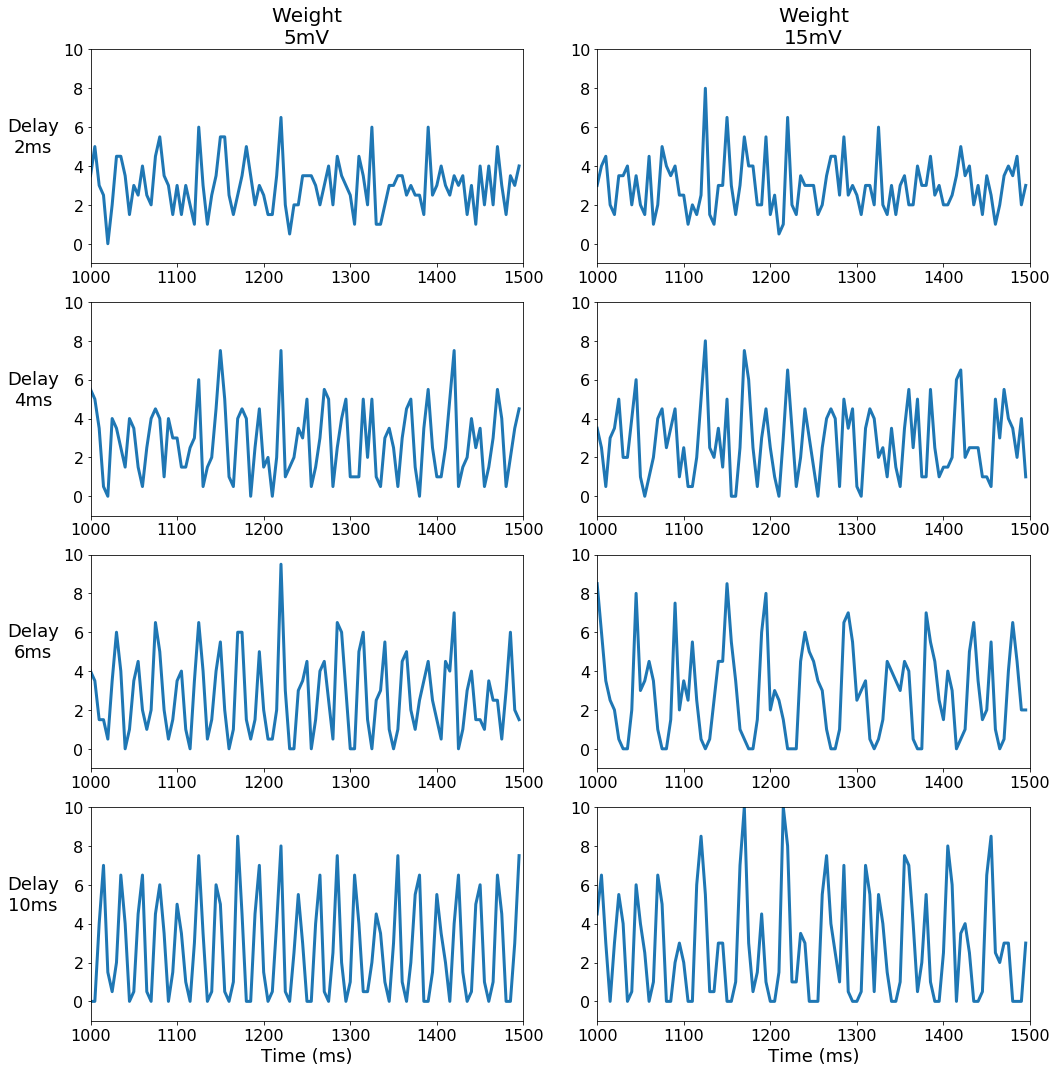

In [47]:
#_, axarr = plt.subplots(4, 2, figsize=(15, 6))
_, axarr = plt.subplots(4, 2, figsize=(15, 15))
dt, shift = 5, 5
start, end = 1000, 1500
for i, xs in enumerate(zip(results, args, axarr.flatten())):
#    ax = axarr[i//len(delays)]
    dat, arg, ax = xs
    d, w, s = arg
    x = dat['X']
    n = 40
    plot_ma(n, x, dt, shift, ax=ax, start=start, end=end, label='D: {}, W: {}'.format(d, w))
    if i % len(weights) == 0:
        ax.set_ylabel('Delay\n{}ms'.format(d), rotation=0, labelpad=30)
    else:
        ax.set_ylabel('')
    if i < len(weights):
        ax.set_title('Weight\n{}mV'.format(w))
    if i >= len(weights) * (len(delays) - 1):
        ax.set_xlabel('Time (ms)')
    ax.set_xlim([start, end])
    ax.set_ylim([-1, 10])
#for ax in axarr.flatten():
#    ax.legend(loc=3)
plt.tight_layout()
plt.show()

In [62]:
args

[(1, 5, 2),
 (1, 10, 2),
 (1, 15, 2),
 (2, 5, 2),
 (2, 10, 2),
 (2, 15, 2),
 (3, 5, 2),
 (3, 10, 2),
 (3, 15, 2),
 (4, 5, 2),
 (4, 10, 2),
 (4, 15, 2),
 (5, 5, 2),
 (5, 10, 2),
 (5, 15, 2),
 (10, 5, 2),
 (10, 10, 2),
 (10, 15, 2),
 (15, 5, 2),
 (15, 10, 2),
 (15, 15, 2)]

In [41]:
list(axarr.flatten())

In [36]:
[ax1, ax2, ax3, ax4]

In [20]:
axarr[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e8d4d90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10ea97dd0>], dtype=object)

(15, 15, 1)
5,868 exc spikes, 7,534 inh spikes


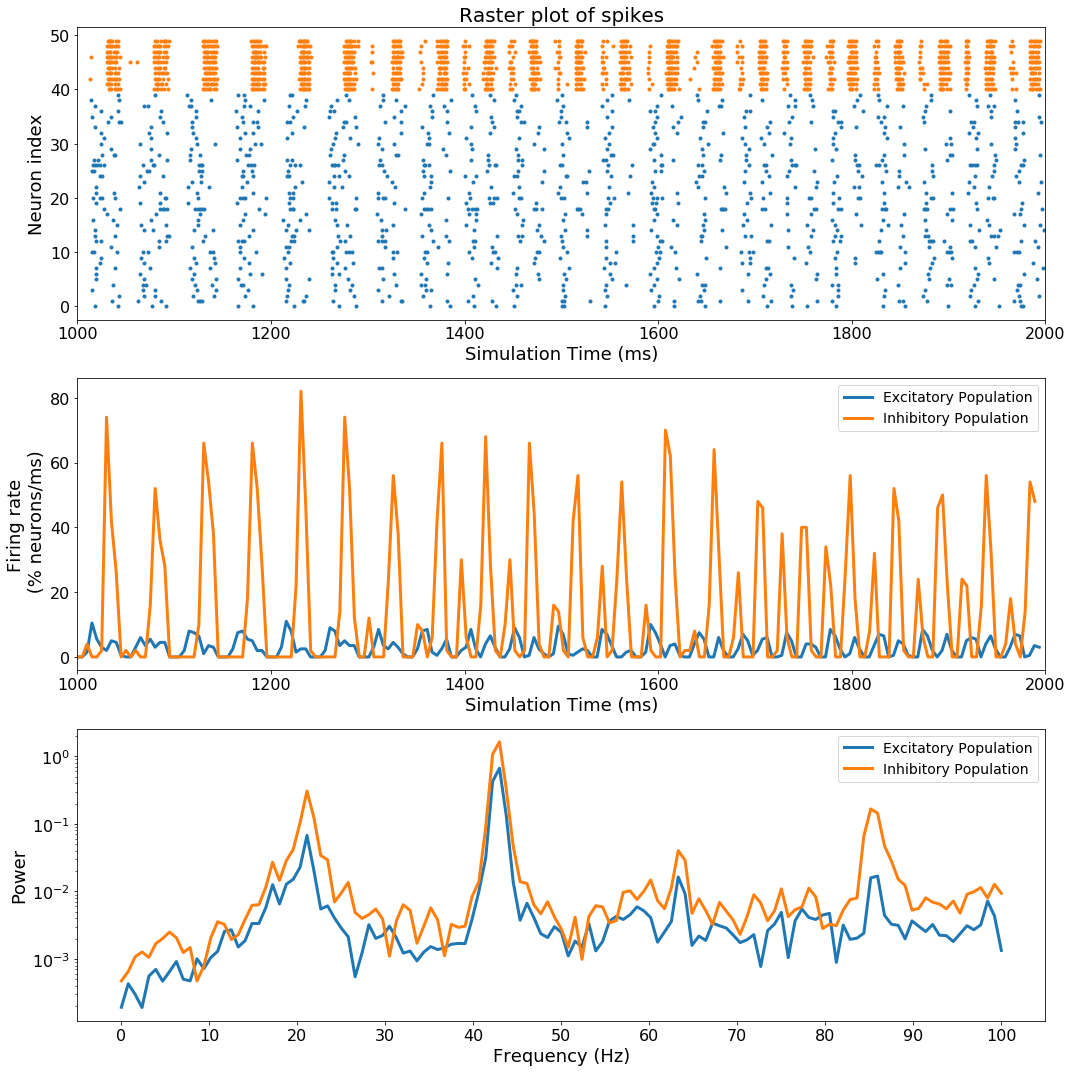

In [33]:
i=3
print(args[i])
plot_stuff(results[i])